# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1146]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [1148]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install imbalanced-learn xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

## Data Overview

- Observations
- Sanity checks


In [1153]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Bankchurners.csv")
data = df.copy()

In [1154]:
df = pd.read_csv("Bankchurners.csv")
data = df.copy()

In [1155]:
print("Info:\n", data.info())
print("Describe:\n", data.describe())
print("Features that contains Null/Nan:\n", data.isnull().any())
print("Features with Null/Nan count:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Observations/Sanity Checks 
* 1) Six features/variables are categorical like,
     * 1.1) Attrirtion_flag
     * 1.2) Gender
     * 1.3) Education_level
     * 1.4) Maritial_Status
     * 1.5) Income_Category
     * 1.6) Card_Category
* 2) Education_Level and Marital_Status features/variables contain null values, must be fixed
* 3) Non-categorical features/variables contain values in different scale, must be fixed
     

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

* 1. How is the total transaction amount distributed?
   * [SP]  *
     * Dataset is right skewed.
     * All of the customers have made credit card transactions on amount atleast 510 in last 12 months.
     * Around 50% customers made transactions amount upto 3899. Lot of Outliers on right side, these people have made transactions on amount morethan 75% of the customers
   
* 2. What is the distribution of the level of education of customers?
    * [SP]
      * Around 15% customers have not mentioned their education or data is missing.
      * Majority/70% of the customers are educated. Around 40% customers are graduates and above.
      * Around 30% customers are with basic education i.e high school and college. Around 15% customers are uneducated
   
* 3. What is the distribution of the level of income of customers?
    * [SP]
      * 11% of the data contains invalid value "ABC", must be fixed.
      * Around 36% customers earn less than 40K which is the lowest limt.
      * Majority/55% customers earn morethan 40K. Around 7.2% customers earn greaterthan 120K which is the highest limit

* 4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
    * [SP]
      * 25% attritioned Customers have amount change below 0.5.
      * 50% attritioned Customers have amount change below 0.7.
      * Few attritioned Customers have 0 amount change and few had maximum and more that the max of the existing Customers
   
* 5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
    * [SP]
      * Majority of the attritioned Customers were inactive atleast for 1 month and upto 4 months in last 12 months.
      * 50% of the attritioned customers were inactive between 2 and 3 months in last 12 months.
      * 50% of the existing customers were incactive btw 0 and 2 months in last 12 months
   
* 6. What are the attributes that have a strong correlation with each other?
     * [SP]
       * Customer_Age and Months_on_book are highly corelate and both are less correlated to the target vaiable, good to remove months_on_book.
       * Credit_Limit is fully correlated with Avg_Open_To_Buy, either one must be dropped. Based on target variable correlation, Avg_Open_To_Buy must be dropped.
       * Total_Trans_Amt and Total_Trans_Ct are highly correlated, based on the target Correlation Total_Trans_Amt must be removed but will keep it, as it is one of the important parameter of the credit card usage. Total_Revolving_Bal, Total_Tran_Amt, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio features are significantly correlated to target variable whereas Customer_Age, Dependent_count, Credit_Limit are least correlated to target.
       * ( ### High Correlation assumption >/< +/-0.75 )



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [1161]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

In [1162]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1163]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [1164]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate Analysis:

################ CLIENTNUM ID Variable ##################
count    1.012700e+04
mean     7.391776e+08
std      3.690378e+07
min      7.080821e+08
25%      7.130368e+08
50%      7.179264e+08
75%      7.731435e+08
max      8.283431e+08
Name: CLIENTNUM, dtype: float64


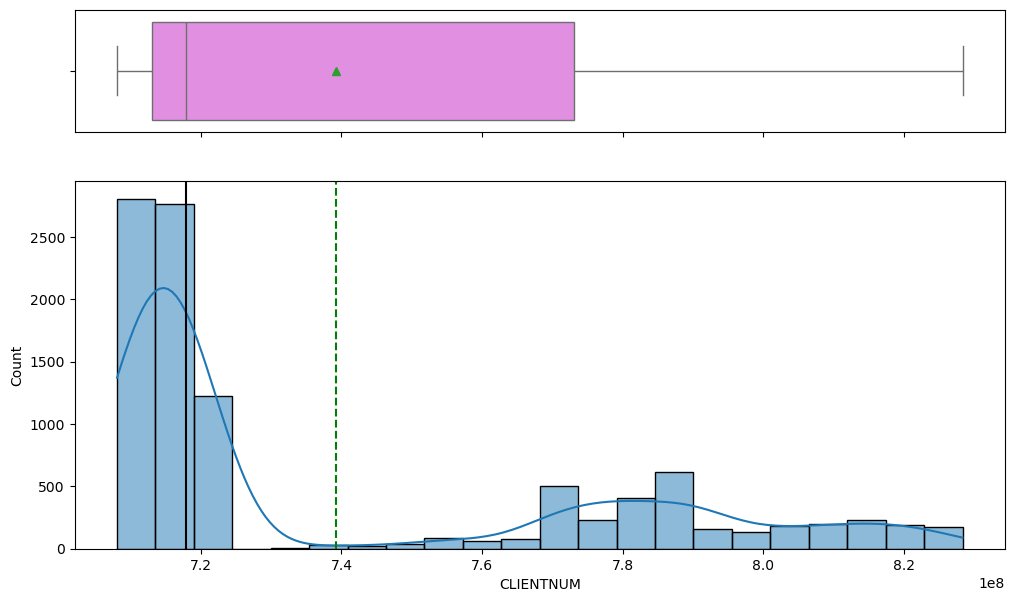

In [1166]:
print("################ CLIENTNUM ID Variable ##################")
print(data['CLIENTNUM'].describe())
histogram_boxplot(data,'CLIENTNUM', kde=True)

##### CLIENTNUM observations

* 1. All Unique
* 2. Dataset is right skewed, median less than mean
* 3. Distributed un-evenly 

################ Customer_Age  Variable ##################
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64


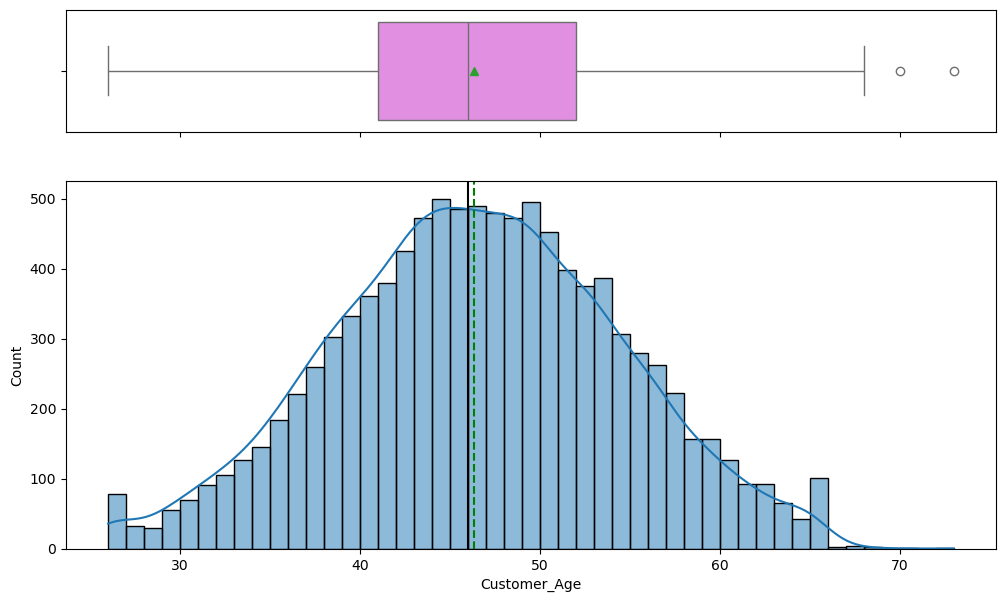

In [1168]:
print("################ Customer_Age  Variable ##################")
print(data['Customer_Age'].describe())
histogram_boxplot(data,'Customer_Age', kde=True)

#### Customer_Age observations

  1. Dataset is not that skewed, median is slightly less than mean but negligible
  2. Majority/80% of the customers are in the age group of 30-60 yrs
  3. No outliers

################ Dependent_count  Variable ##################
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64


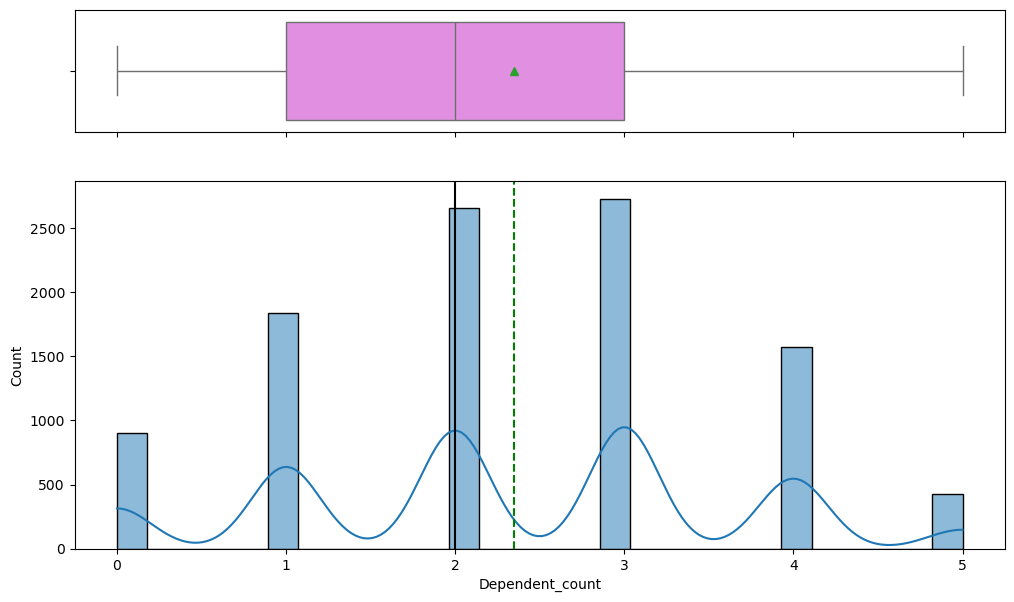

In [1171]:
print("################ Dependent_count  Variable ##################")
print(data['Dependent_count'].describe())
histogram_boxplot(data,'Dependent_count', kde=True)

#### Dependent_count observations

 1. Dataset is right skewed, median is less than mean
 2. Majority/70% of the customers have morethan 2 dependents
 3. Around 10% customers dont have any dependents
 4. Around 20% customers have 1 dependents
 5. No Outliers

################ Months_on_book  Variable ##################
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64


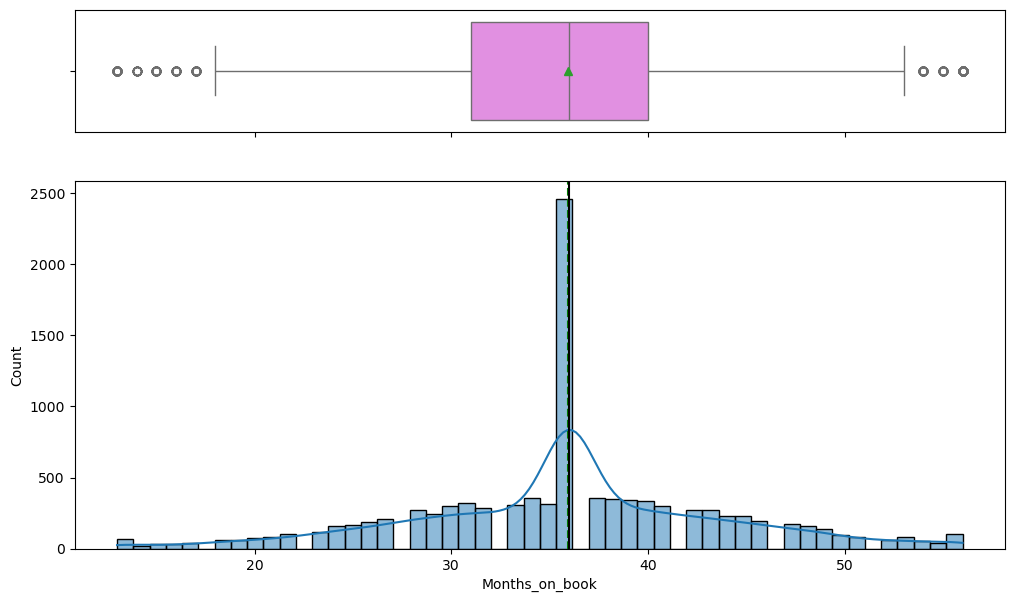

In [1181]:
print("################ Months_on_book  Variable ##################")
print(data['Months_on_book'].describe())
histogram_boxplot(data,'Months_on_book', kde=True)

#### Months_on_book observations

 1. Dataset is not skewed, looks like normal distribution
 2. Majority/80% of the customers have relationship with the bank btw 20 and 50 months i.e 2.9 to 4.2 yrs
 3. Outliers are present on both sides and are valid

################ Total_Relationship_Count  Variable ##################
count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64


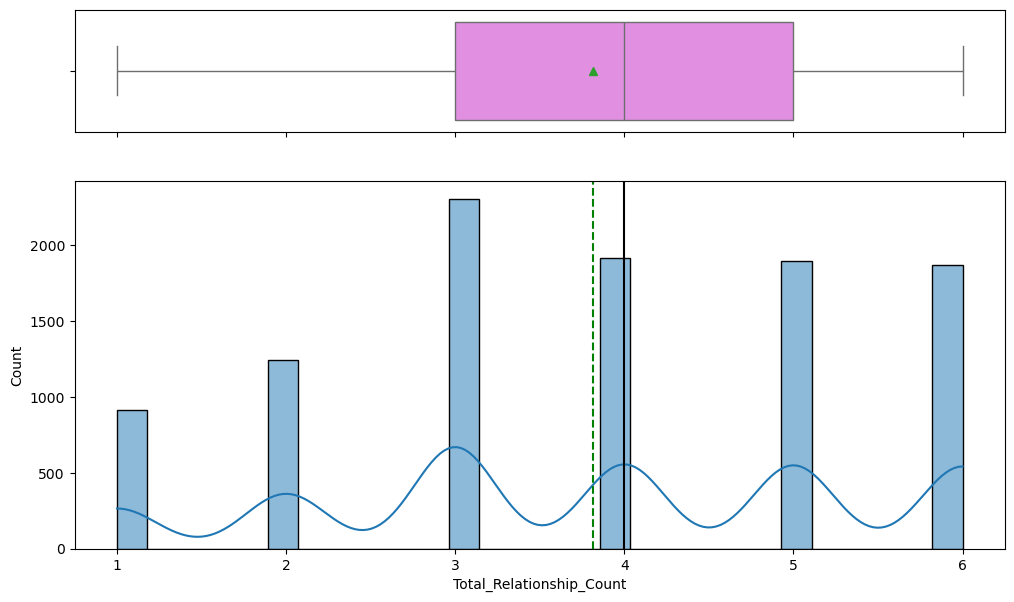

In [1185]:
print("################ Total_Relationship_Count  Variable ##################")
print(data['Total_Relationship_Count'].describe())
histogram_boxplot(data,'Total_Relationship_Count', kde=True)

#### Total_Relationship_Count observations

 1. Dataset is slightly left skewed
 2. Majority/55-60% of the customers hold less than 4 bank offered products
 3. No Outliers

################ Months_Inactive_12_mon  Variable ##################
count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64


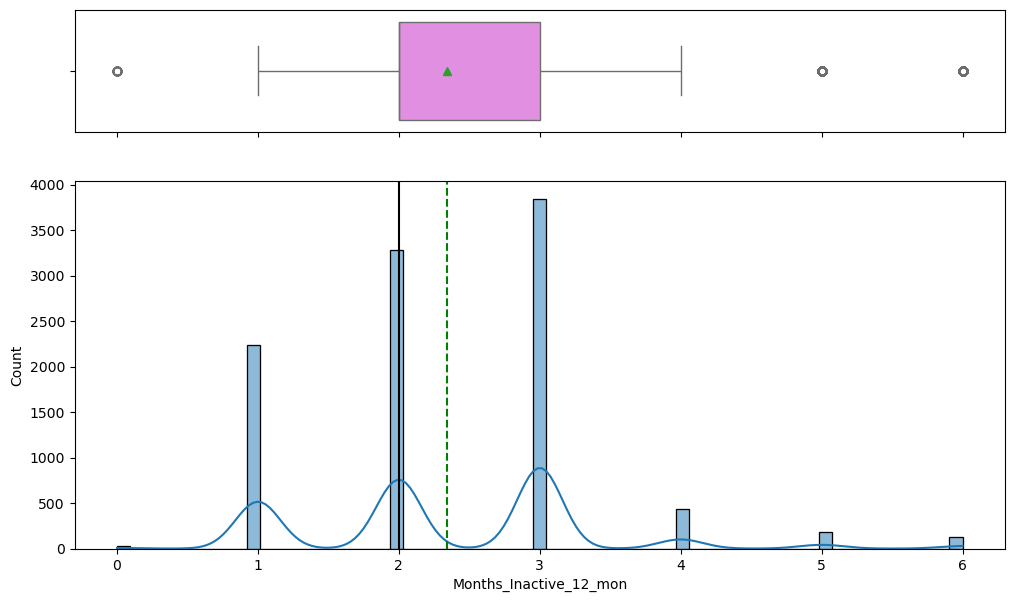

In [1189]:
print("################ Months_Inactive_12_mon  Variable ##################")
print(data['Months_Inactive_12_mon'].describe())
histogram_boxplot(data,'Months_Inactive_12_mon', kde=True)

#### Months_Inactive_12_mon observations

 1. Dataset is slightly right skewed
 2. Around 50% of the customers were inactive for around 2 months
 3. Another 50% of the customers were inactive btw 3 and 5 months
 4. Few Outliers but are valid

################ Contacts_Count_12_mon  Variable ##################
count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64


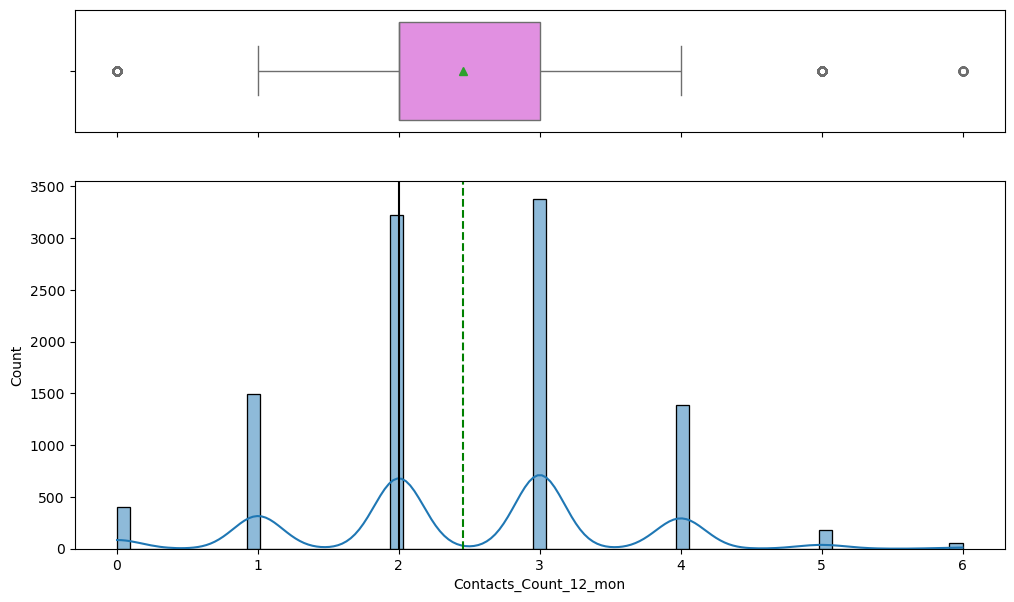

In [1192]:
print("################ Contacts_Count_12_mon  Variable ##################")
print(data['Contacts_Count_12_mon'].describe())
histogram_boxplot(data,'Contacts_Count_12_mon', kde=True)

#### Contacts_Count_12_mon observations

 1. Dataset is slightly right skewed
 2. Around 50% of the customers have contacted bank 2 times
 3. Another 50% of the customers were inactive btw 3 and 5 times
 4. Few Outliers but are valid

################ Credit_Limit  Variable ##################
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64


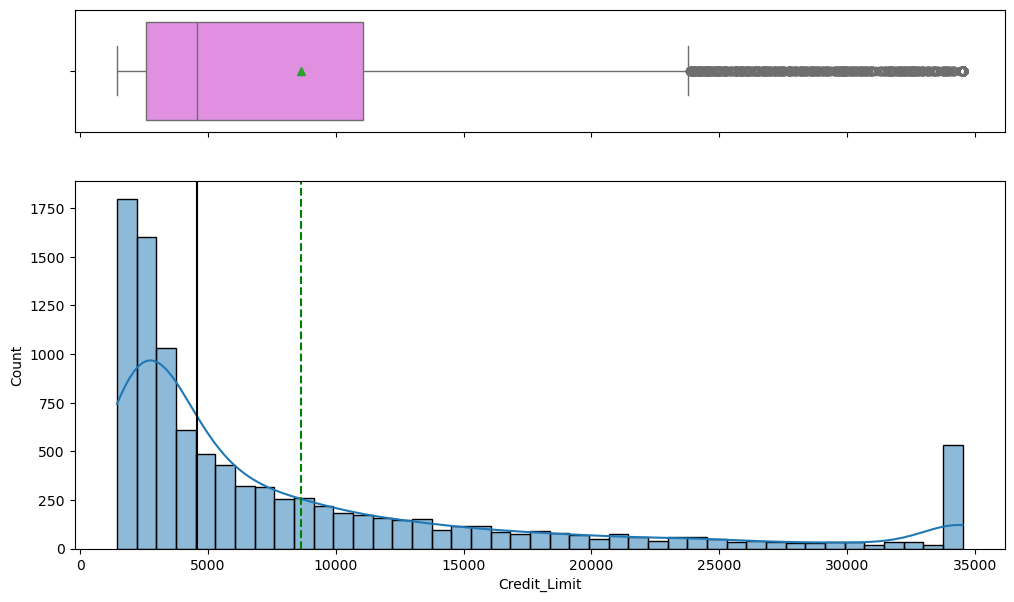

In [1195]:
print("################ Credit_Limit  Variable ##################")
print(data['Credit_Limit'].describe())
histogram_boxplot(data,'Credit_Limit', kde=True)

#### Credit_Limit observations

 1. Dataset is right skewed
 2. Around 50% of the customers have credit limit around 4.5K which is around 12% of the maximum limit
 3. Rest 50% of the customers have morethan 4.5k upto 35K
 4. Many Outliers but are valid

################ Total_Revolving_Bal  Variable ##################
count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64


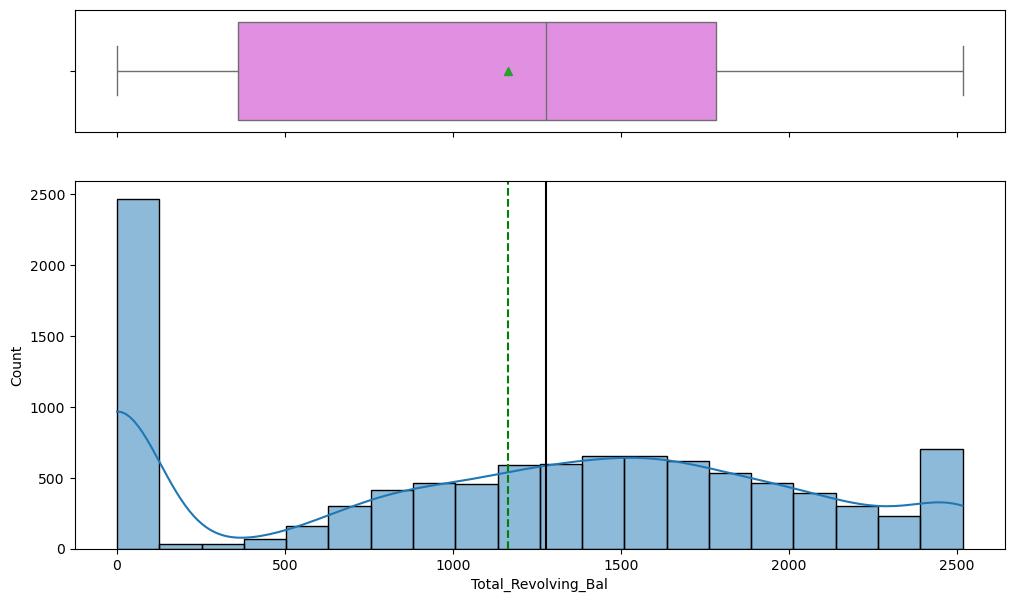

In [1198]:
print("################ Total_Revolving_Bal  Variable ##################")
print(data['Total_Revolving_Bal'].describe())
histogram_boxplot(data,'Total_Revolving_Bal', kde=True)

#### Total_Revolving_Bal observations

 1. Dataset is left skewed slightly
 2. Around 25% of the customers pay the credit card bill full in the month and rest rollover the credit
 3. Majority/70% of the customers rollover credit btw 500 and 2500
 4. No Outliers

################ Avg_Open_To_Buy  Variable ##################
count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64


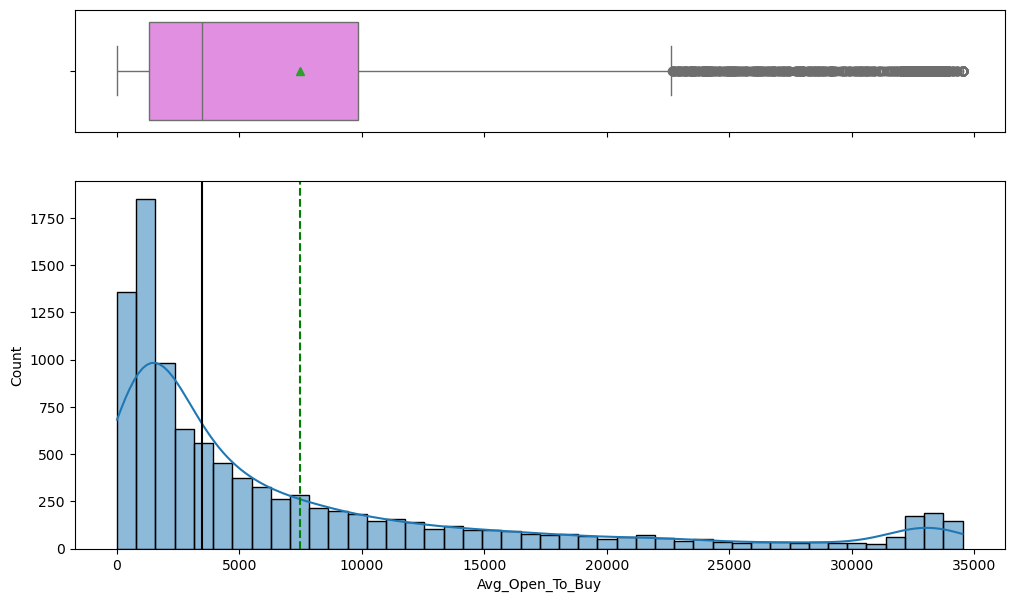

In [1201]:
print("################ Avg_Open_To_Buy  Variable ##################")
print(data['Avg_Open_To_Buy'].describe())
histogram_boxplot(data,'Avg_Open_To_Buy', kde=True)

#### Avg_Open_To_Buy observations

 1. Dataset is right skewed 
 3. Majority/75% of the customers keep atleast 1.3K open credit money 
 4. Lot of right Outliers and are valid, these people may not use the credit card or limits the usage

################ Total_Amt_Chng_Q4_Q1  Variable ##################
count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64


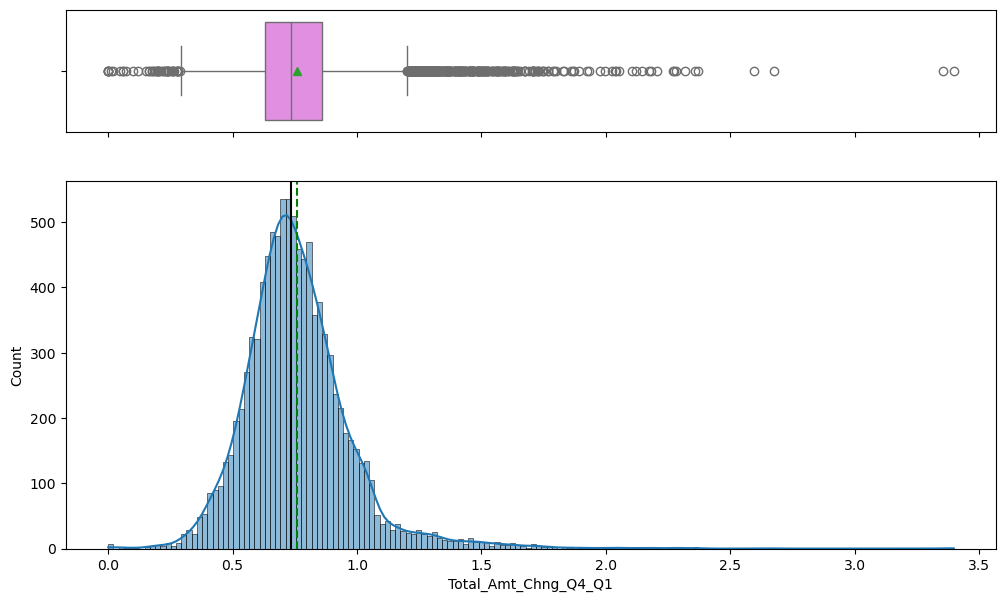

In [1204]:
print("################ Total_Amt_Chng_Q4_Q1  Variable ##################")
print(data['Total_Amt_Chng_Q4_Q1'].describe())
histogram_boxplot(data,'Total_Amt_Chng_Q4_Q1', kde=True)

#### Total_Amt_Chng_Q4_Q1 observations

 1. Dataset is slightly right skewed 
 3. Majority/90% of customers have increased the credit card spend from Q4 to Q1 
 4. Lot of Outliers on both sides, few people have decreased their spend and in the same way few more have increased the spend by more than an average rate

################ Total_Ct_Chng_Q4_Q1  Variable ##################
count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


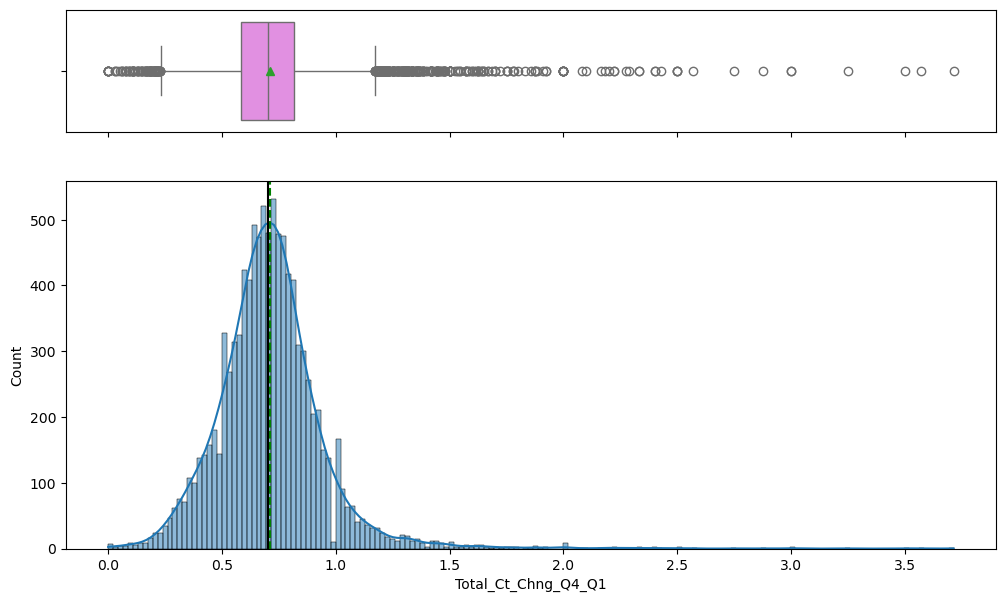

In [1207]:
print("################ Total_Ct_Chng_Q4_Q1  Variable ##################")
print(data['Total_Ct_Chng_Q4_Q1'].describe())
histogram_boxplot(data,'Total_Ct_Chng_Q4_Q1', kde=True)

#### Total_Ct_Chng_Q4_Q1 observations

 1. Dataset is slightly right skewed but negligible
 3. Majority/90% of customers have increased the credit card transactions from Q4 to Q1 
 4. Lot of Outliers on both sides and are valid, few people have decreased their transactions and in the same way few more have increased the number of transactions by more than an average rate

################ Total_Trans_Amt  Variable ##################
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64


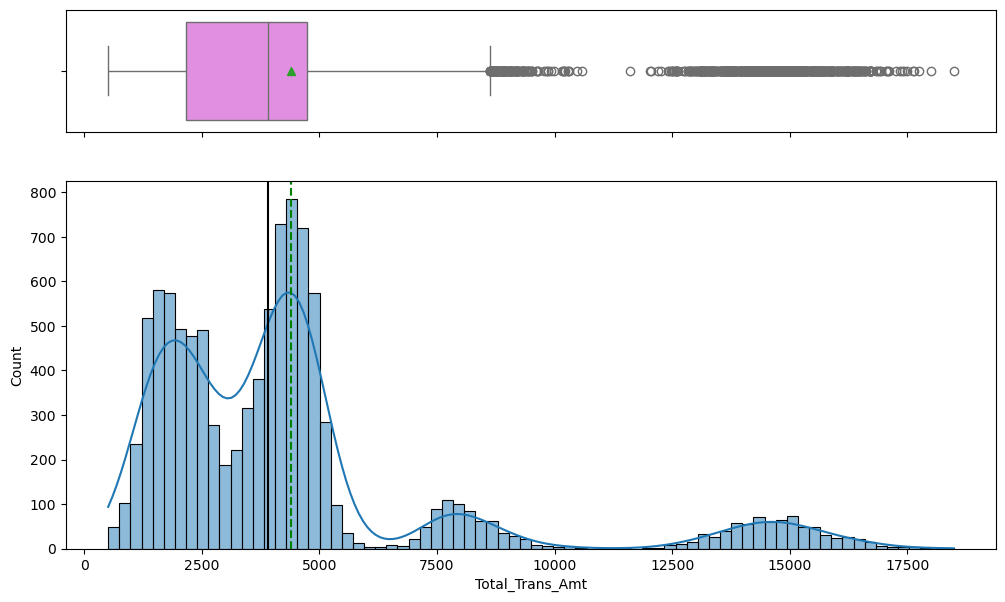

In [1210]:
print("################ Total_Trans_Amt  Variable ##################")
print(data['Total_Trans_Amt'].describe())
histogram_boxplot(data,'Total_Trans_Amt', kde=True)

#### Total_Trans_Amt observations

 1. Dataset is right skewed 
 3. All of the customers have made credit card transactions on amount atleast 510 in last 12 months
 4. Around 50% customers made transactions amount upto 3899
 5. Lot of Outliers on right side and are valid, these people have made transactions on amount morethan 75% of the customers

################ Total_Trans_Ct  Variable ##################
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64


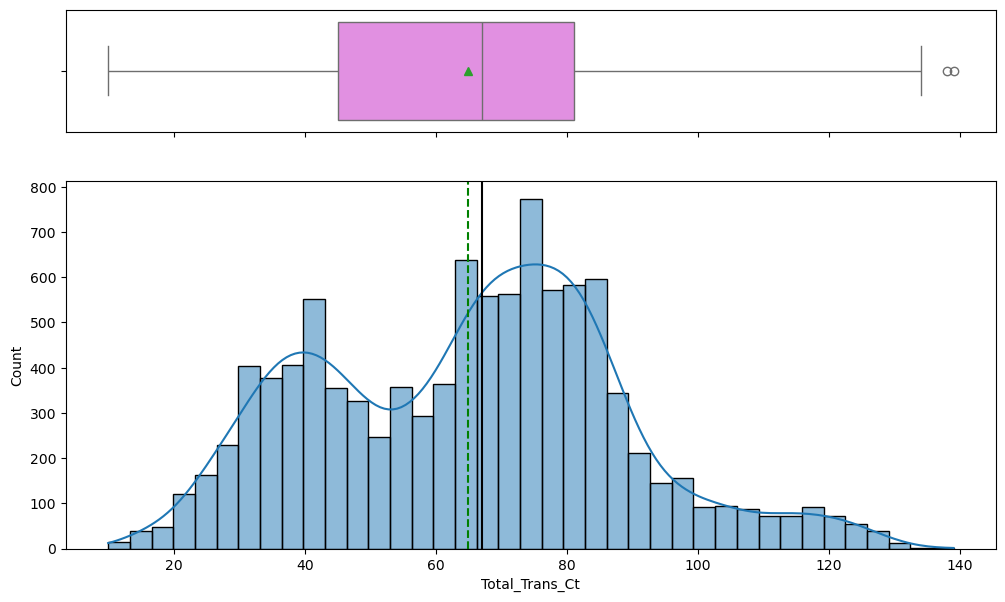

In [1213]:
print("################ Total_Trans_Ct  Variable ##################")
print(data['Total_Trans_Ct'].describe())
histogram_boxplot(data,'Total_Trans_Ct', kde=True)

#### Total_Trans_Ct observations

 1. Dataset is slightly left skewed 
 3. All the customers have made atleast 10 credit card transactions in last 12 months 
 4. Around 50% customers have made btw 10 to 67 transactions and the rest 50% made 67 to 139 transactions in last 12 months 
 5. Very few Outliers on right side and are valid, these people have made transactions morethan 75% of the customers

################ Avg_Utilization_Ratio  Variable ##################
count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64


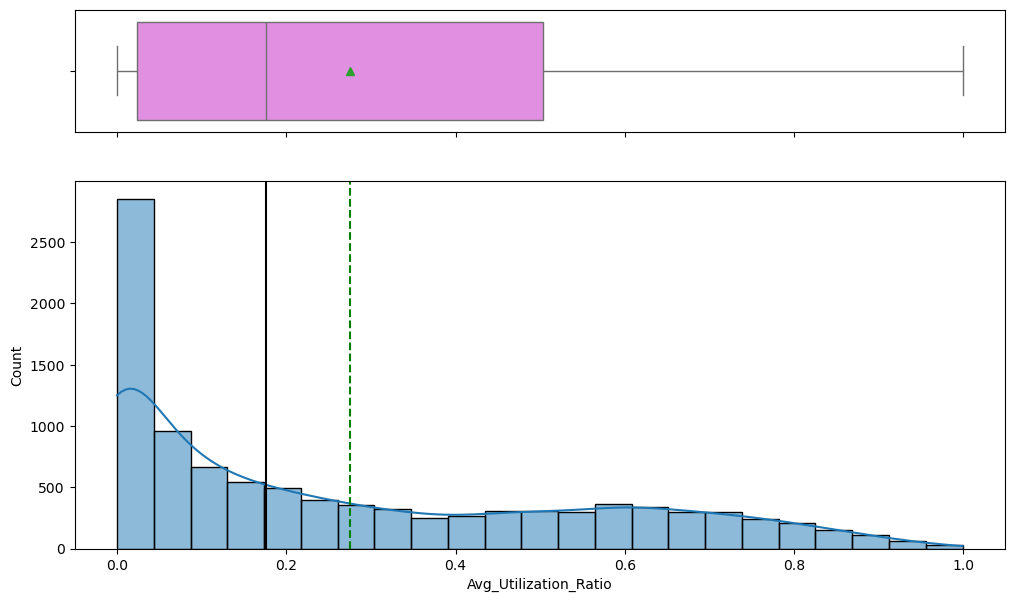

In [1216]:
print("################ Avg_Utilization_Ratio  Variable ##################")
print(data['Avg_Utilization_Ratio'].describe())
histogram_boxplot(data,'Avg_Utilization_Ratio', kde=True)

#### Avg_Utilization_Ratio observations

 1. Dataset is right skewed
 2. Around 25% of the customers spent less than 2.5% of the credit limit
 3. Majority/60% of customers spent 20% to 80% of their credit limit  
 5. No Outliers 

################ Attrition_Flag  Variable ##################
count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object


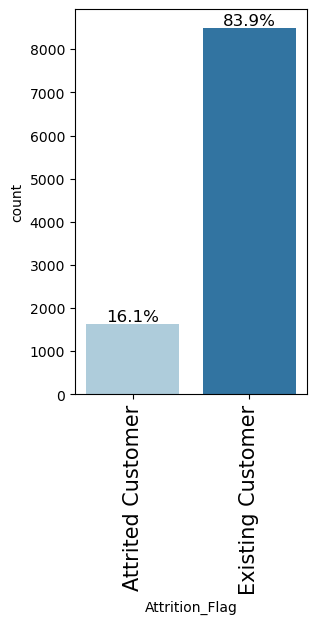

In [1219]:
print("################ Attrition_Flag  Variable ##################")
print(data['Attrition_Flag'].describe())
labeled_barplot(data,'Attrition_Flag',perc=True)

################ Education_Level  Variable ##################
count         8608
unique           6
top       Graduate
freq          3128
Name: Education_Level, dtype: object


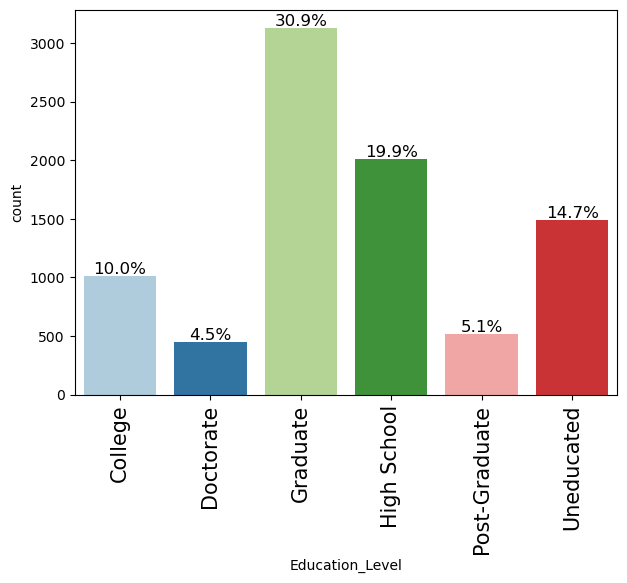

In [1222]:
print("################ Education_Level  Variable ##################")
print(data['Education_Level'].describe())
labeled_barplot(data,'Education_Level',perc=True)

### Education_Level Stats:
1) Around 15% customers have not mentioned their education or data is missing
2) Majority/70% of the customers are educated
3) Around 40% customers are graduates and above
4) Around 30% customers are with basic education i.e high school and college
5) Around 15% customers are uneducated
6) Missing data must be fixed

################ Marital_Status  Variable ##################
count        9378
unique          3
top       Married
freq         4687
Name: Marital_Status, dtype: object


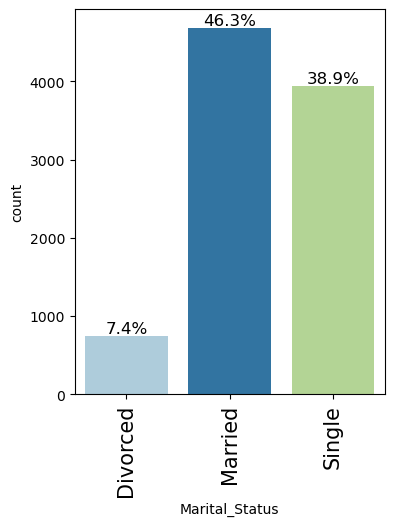

In [1225]:
print("################ Marital_Status  Variable ##################")
print(data['Marital_Status'].describe())
labeled_barplot(data,'Marital_Status',perc=True)

### Marital_Status Stats:
1) Around 8% customers have not mentioned their maritial status or data is missing
2) Majority/55% of the customers are married (and divorced)
3) Around 7.5% customers are divorced
4) Around 39% customers never married/single
5) Missing data must be fixed


################ Income_Category  Variable ##################
count              10127
unique                 6
top       Less than $40K
freq                3561
Name: Income_Category, dtype: object


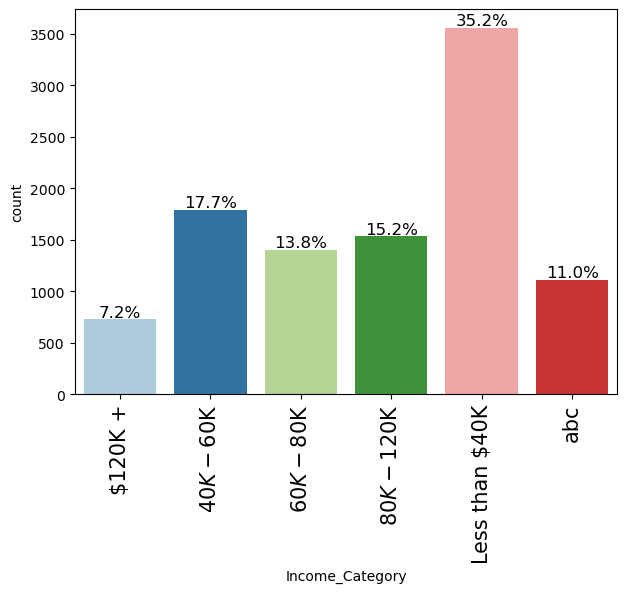

In [1228]:
print("################ Income_Category  Variable ##################")
print(data['Income_Category'].describe())
labeled_barplot(data,'Income_Category',perc=True)

### Income_Category Stats:
1) 11% of the data contains invalid value "ABC", must be fixed
2) Around 36% customers earn less than $40K which is the lowest limt
3) Majority/55% customers earn morethan $40K
4) Around 7.2% customers earn greaterthan $120K which is the highest limit


################ Card_Category  Variable ##################
count     10127
unique        4
top        Blue
freq       9436
Name: Card_Category, dtype: object


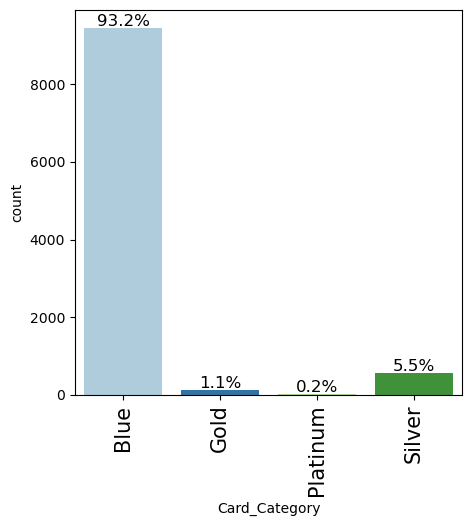

In [1231]:
print("################ Card_Category  Variable ##################")
print(data['Card_Category'].describe())
labeled_barplot(data,'Card_Category',perc=True)

### Card_Category Stats:
1) Majority/94% customers hold Blue category credit card
2) Next majority customers hold Silver category credit cards
3) Category with the least customers is Platinum at 0.2% and next to it is Gold at 1.1%


#### Bivariate Analysis:

################ Customer_Age vs Attrition_Flag  Variable ##################


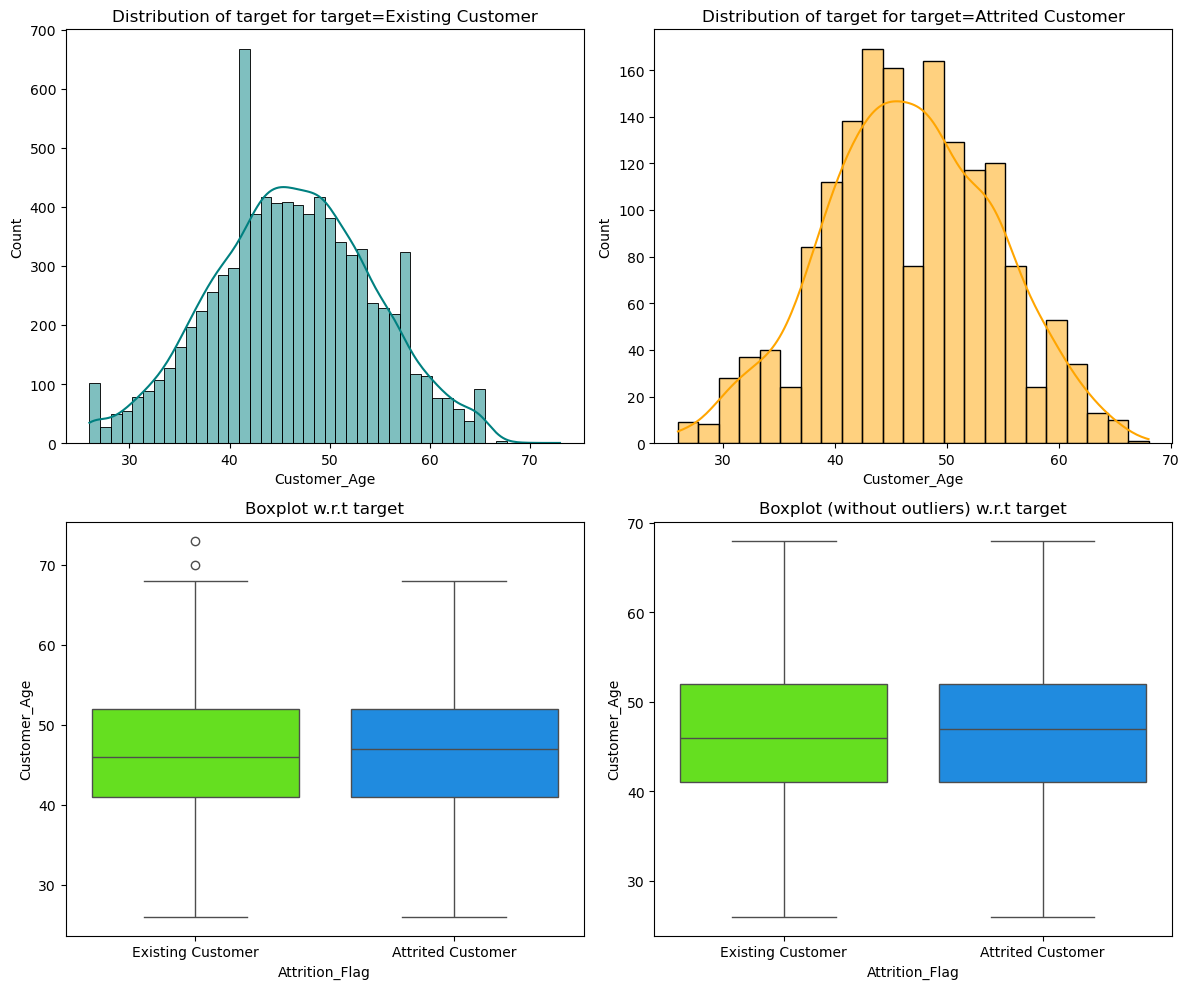

In [1235]:
print("################ Customer_Age vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Customer_Age', 'Attrition_Flag')

### Customer_Age vs Attrition_Flag Stats:
1) Customer age is evenly distrubuted between the attributed and the existing ones 

################ Dependent_count vs Attrition_Flag  Variable ##################


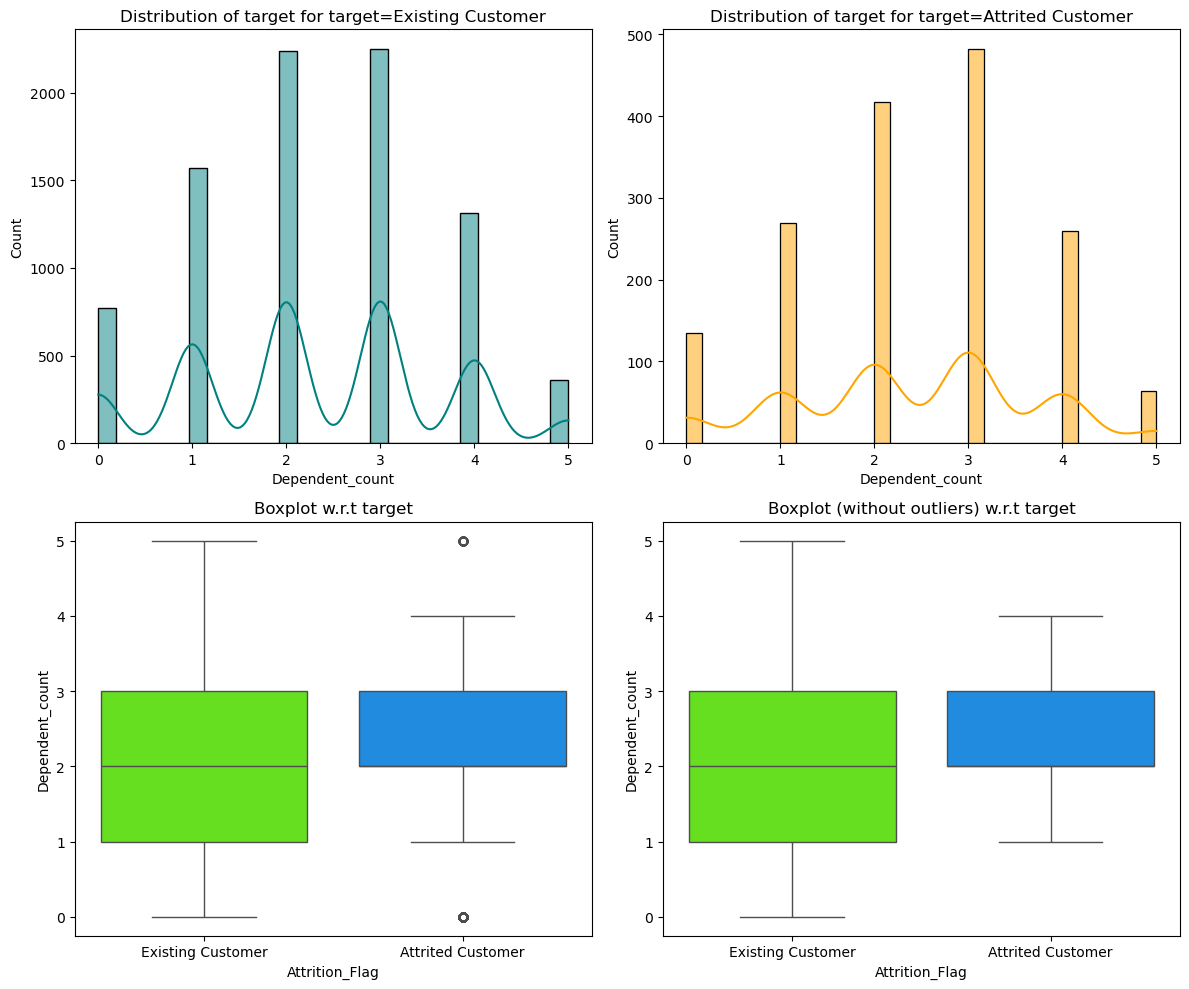

In [1238]:
print("################ Dependent_count vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Dependent_count', 'Attrition_Flag')

### Dependent_count vs Attrition_Flag Stats:
1) Customers with 2 or 3 dependents have attritioned more 

################ Months_on_book vs Attrition_Flag  Variable ##################


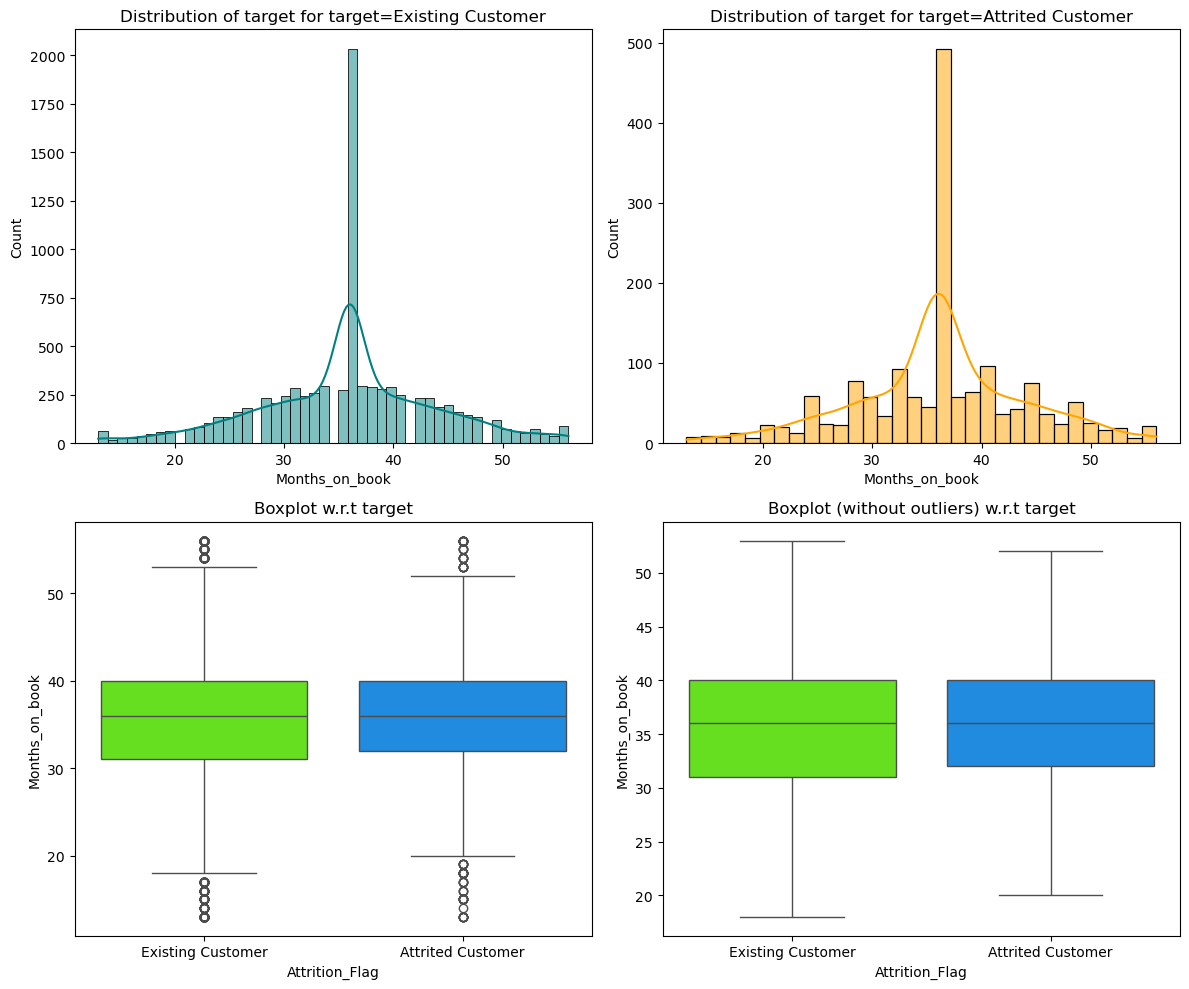

In [1241]:
print("################ Months_on_book vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Months_on_book', 'Attrition_Flag')

### Months_on_book vs Attrition_Flag Stats:
1) Majority of the Customers those left the bank had morethan 32 months relationship

################ Total_Relationship_Count vs Attrition_Flag  Variable ##################


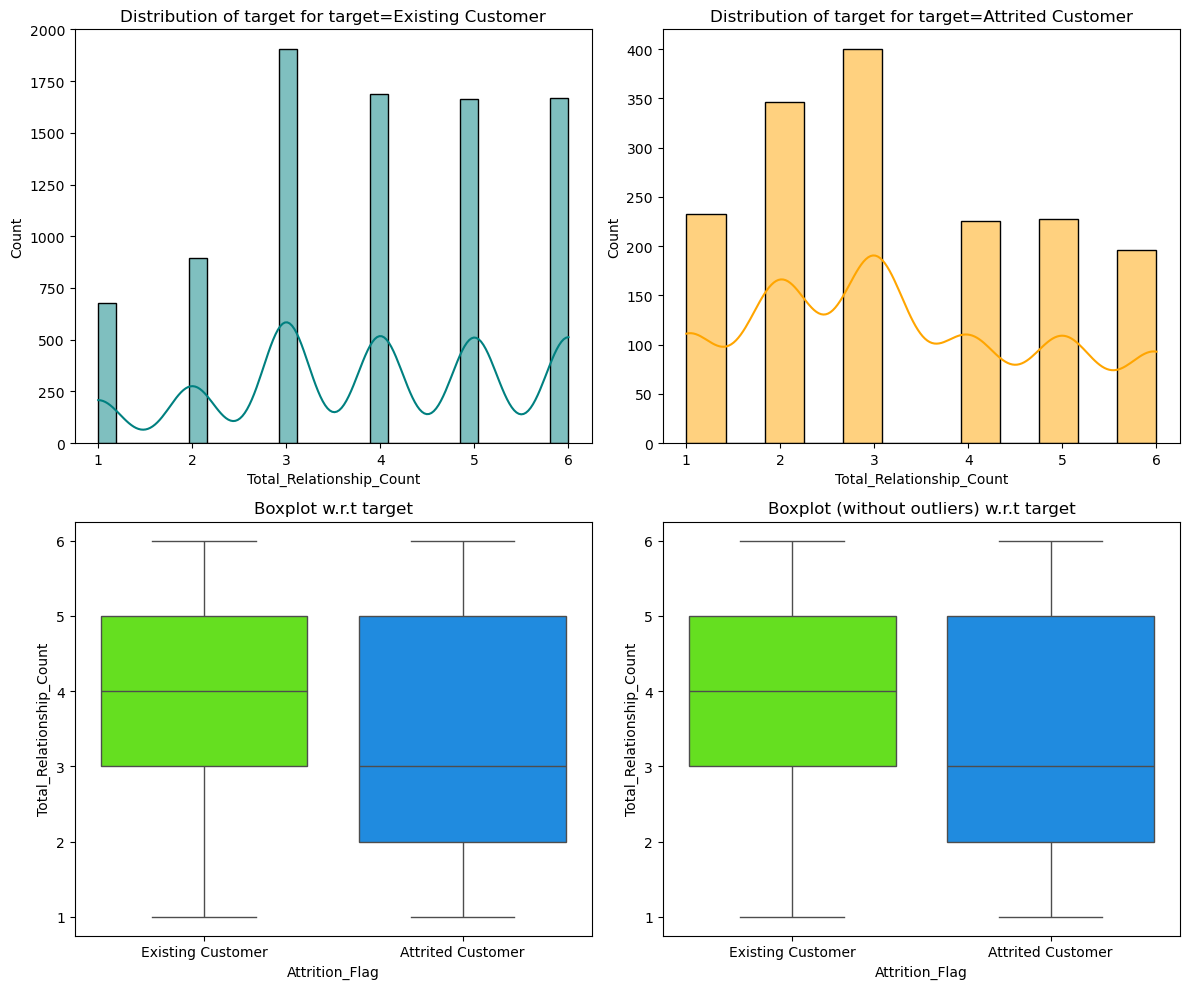

In [1244]:
print("################ Total_Relationship_Count vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Total_Relationship_Count', 'Attrition_Flag')

### Total_Relationship_Count vs Attrition_Flag Stats:
1) Majority of the existing Customers have held more than 3 bank products
2) 50% of the attritioned customers have held less than or equal to 3 bank products 

################ Months_Inactive_12_mon vs Attrition_Flag  Variable ##################


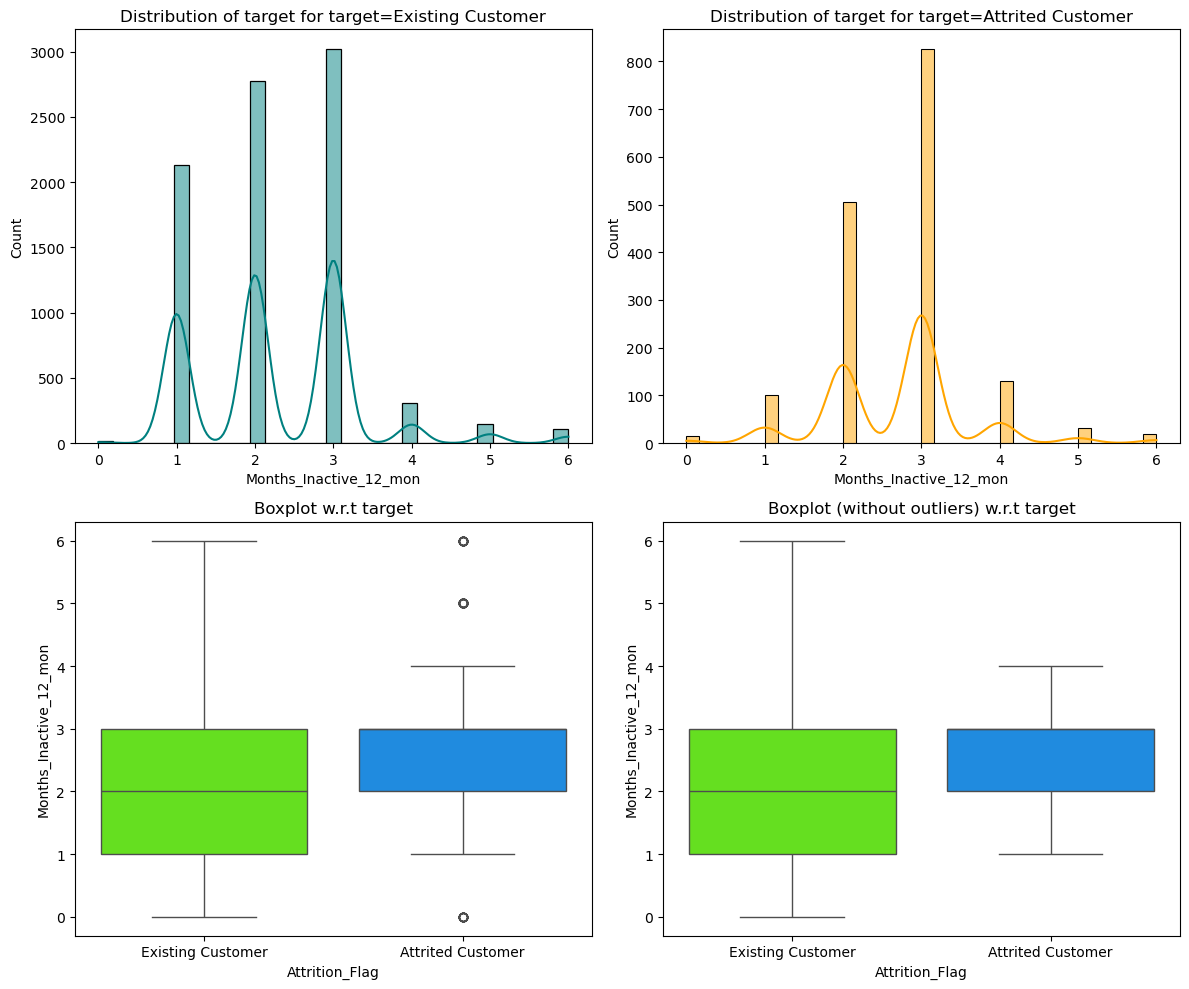

In [1247]:
print("################ Months_Inactive_12_mon vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Months_Inactive_12_mon', 'Attrition_Flag')

### Months_Inactive_12_mon vs Attrition_Flag Stats:
1) Majority of the attritioned Customers were inactive atleast for 1 month and upto 4 months in last 12 months 
2) 50% of the attritioned customers were inactive between 2 and 3 months in last 12 months
3) 50% of the existing customers were incactive btw 0 and 2 months in last 12 months

################ Contacts_Count_12_mon vs Attrition_Flag  Variable ##################


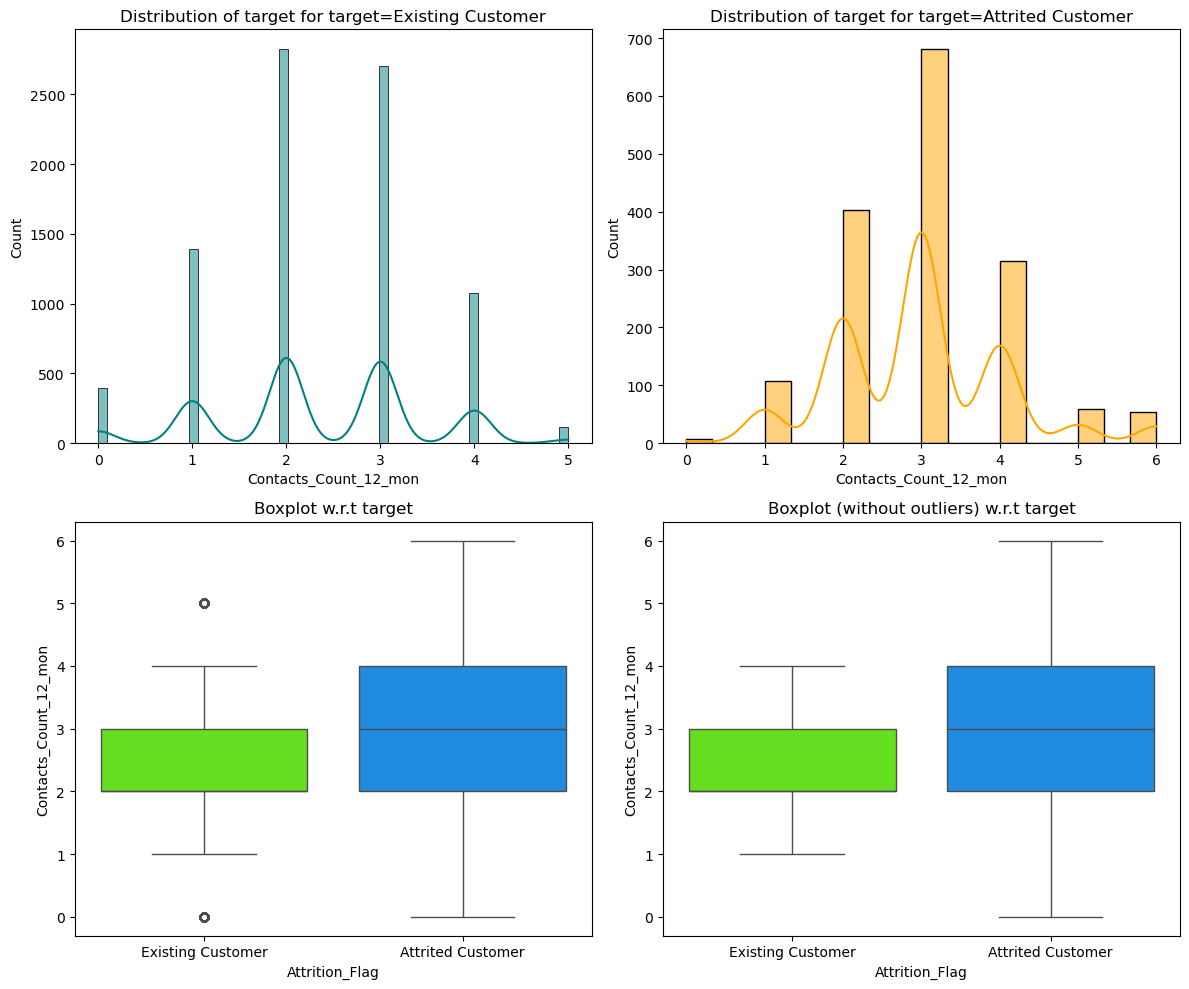

In [1250]:
print("################ Contacts_Count_12_mon vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Contacts_Count_12_mon', 'Attrition_Flag')

### Contacts_Count_12_mon vs Attrition_Flag Stats:
1) 25% attritioned Customers contacted bank atleast 0 and upto 2 times in last 12 months
3) Next 25% of the attritioned customers contacted bank atleast 2 and upto 3 times in last 12 months 
4) Next 25% of the attritioned customers contacted bank atleast 3 and upto 4 times in last 12 months
5) 50% of the exiting customers contacted bank atleast 2 times and upto 3 times in last 12 months
6) 25% of the exisiting customers conatcted bank atleast 1 and upto 2 times in last 12 months  

################ Credit_Limit vs Attrition_Flag  Variable ##################


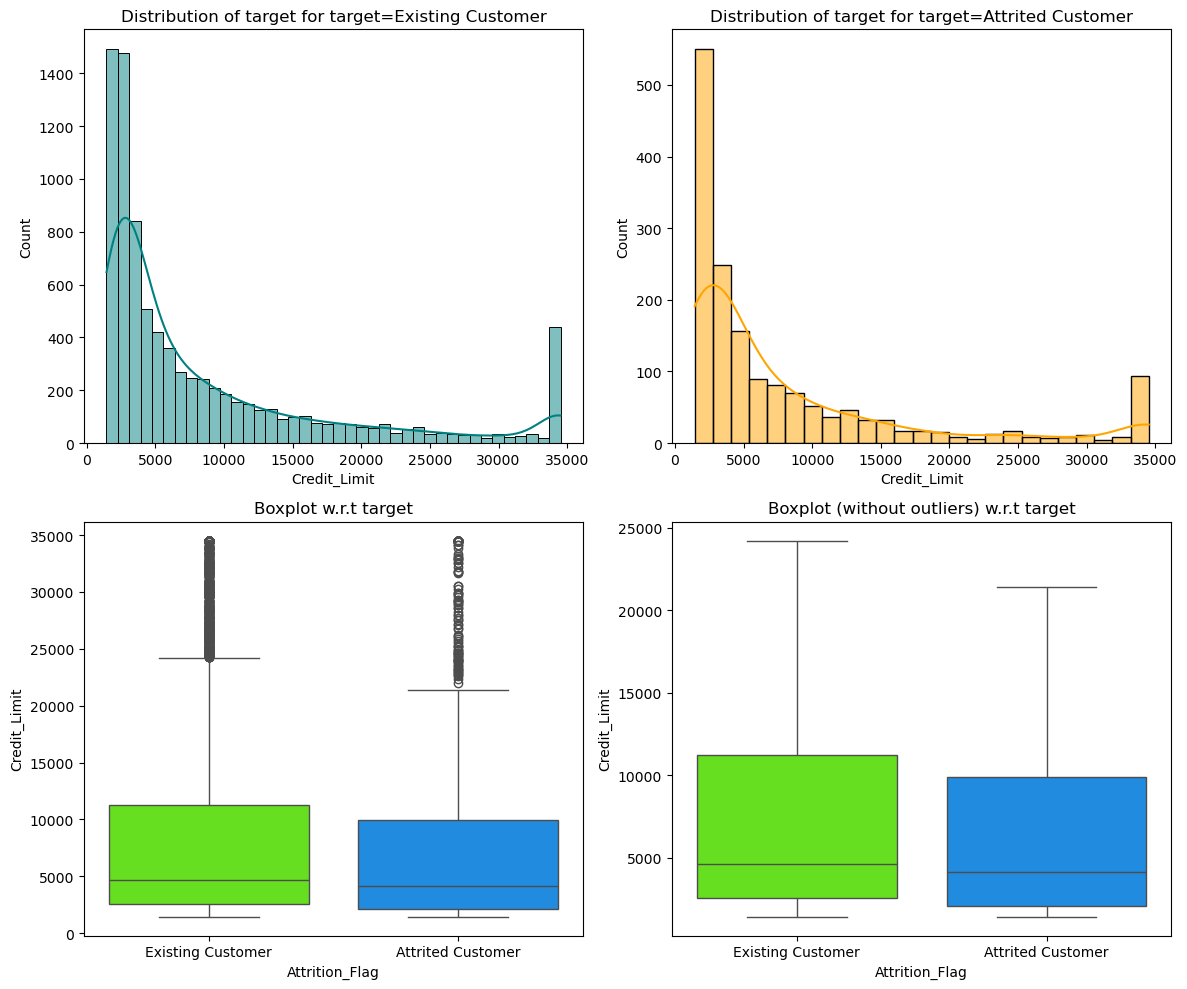

In [1253]:
print("################ Credit_Limit vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Credit_Limit', 'Attrition_Flag')

### Credit_Limit vs Attrition_Flag Stats:
1) 50% attritioned Customers have credit limit lessthan 5000     
2) 75% attritioned Customers have credit limit lessthan 10000
3) Maximum credit limit oif the attritioned customers is around 22000$

################ Total_Revolving_Bal vs Attrition_Flag  Variable ##################


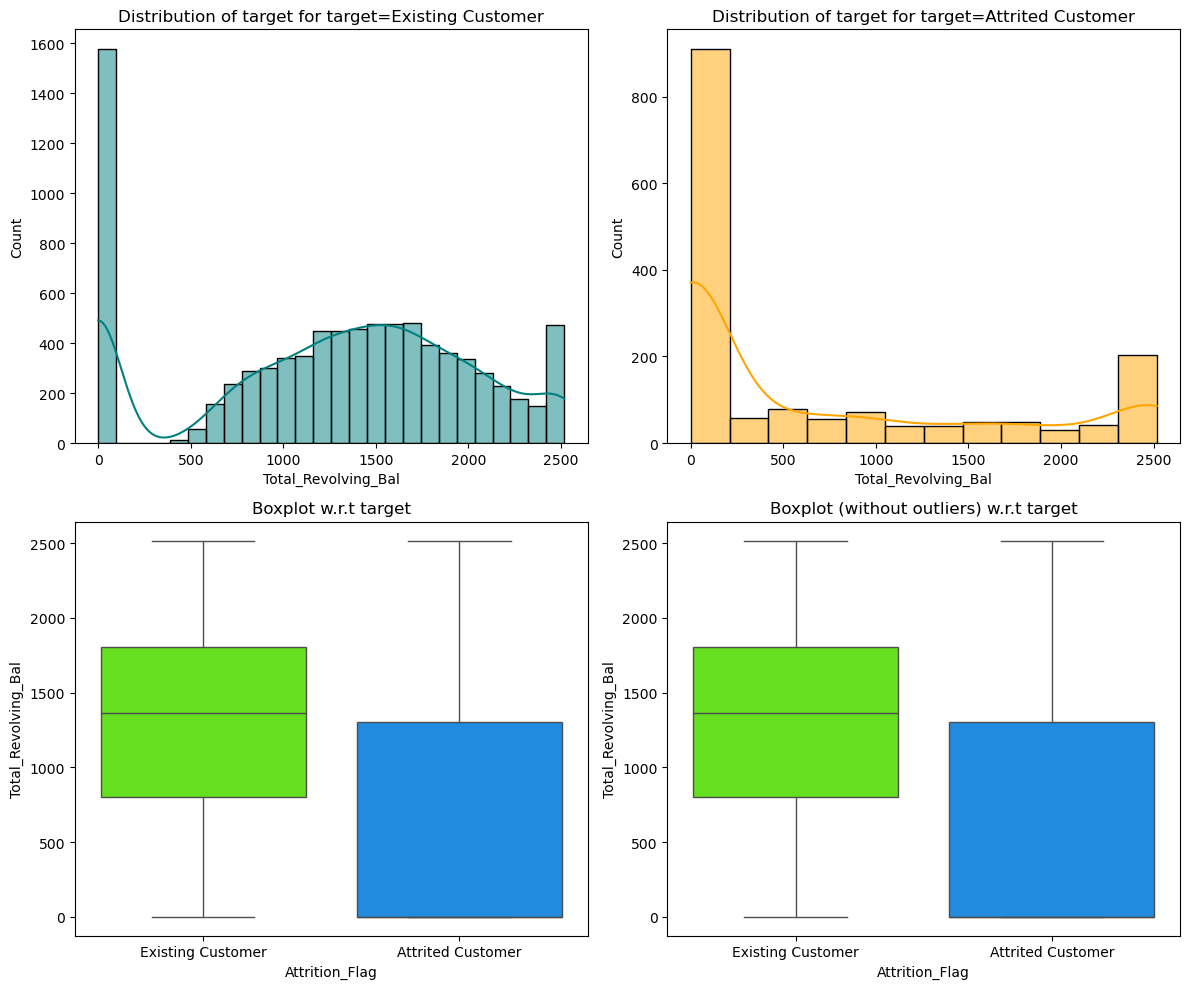

In [1256]:
print("################ Total_Revolving_Bal vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Total_Revolving_Bal', 'Attrition_Flag')

### Total_Revolving_Bal vs Attrition_Flag Stats: 
1) 75% attritioned Customers have revolving balance lessthan 1250
2) In that 75% atleast 25% have 0$ revolving balance 

################ Avg_Open_To_Buy vs Attrition_Flag  Variable ##################


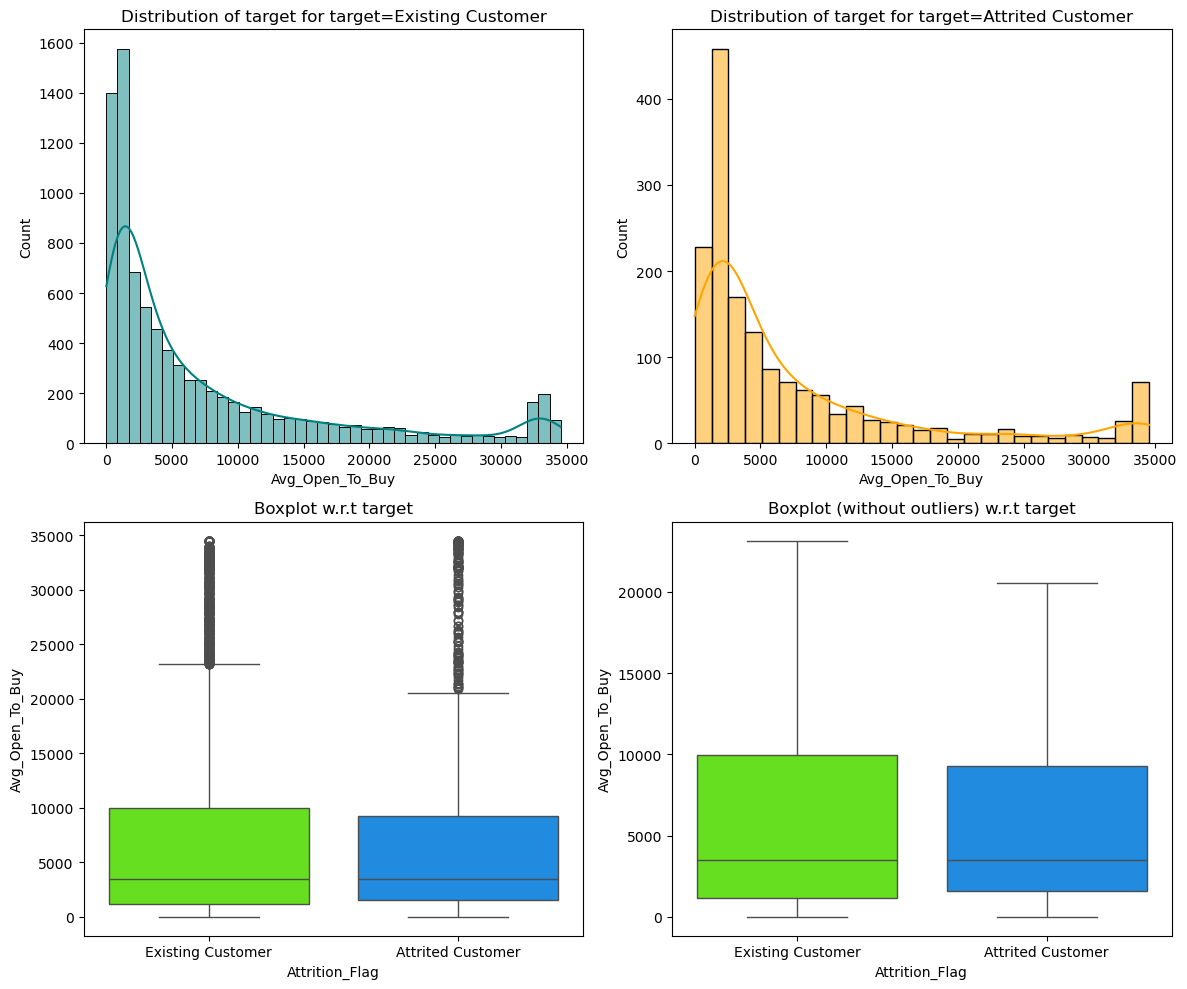

In [1259]:
print("################ Avg_Open_To_Buy vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Avg_Open_To_Buy', 'Attrition_Flag')

### Avg_Open_To_Buy vs Attrition_Flag Stats: 
1) 25% attritioned Customers have open balance of around 1000
2) 50% attritioned Customers have open balance of around 3000

################ Total_Amt_Chng_Q4_Q1 vs Attrition_Flag  Variable ##################


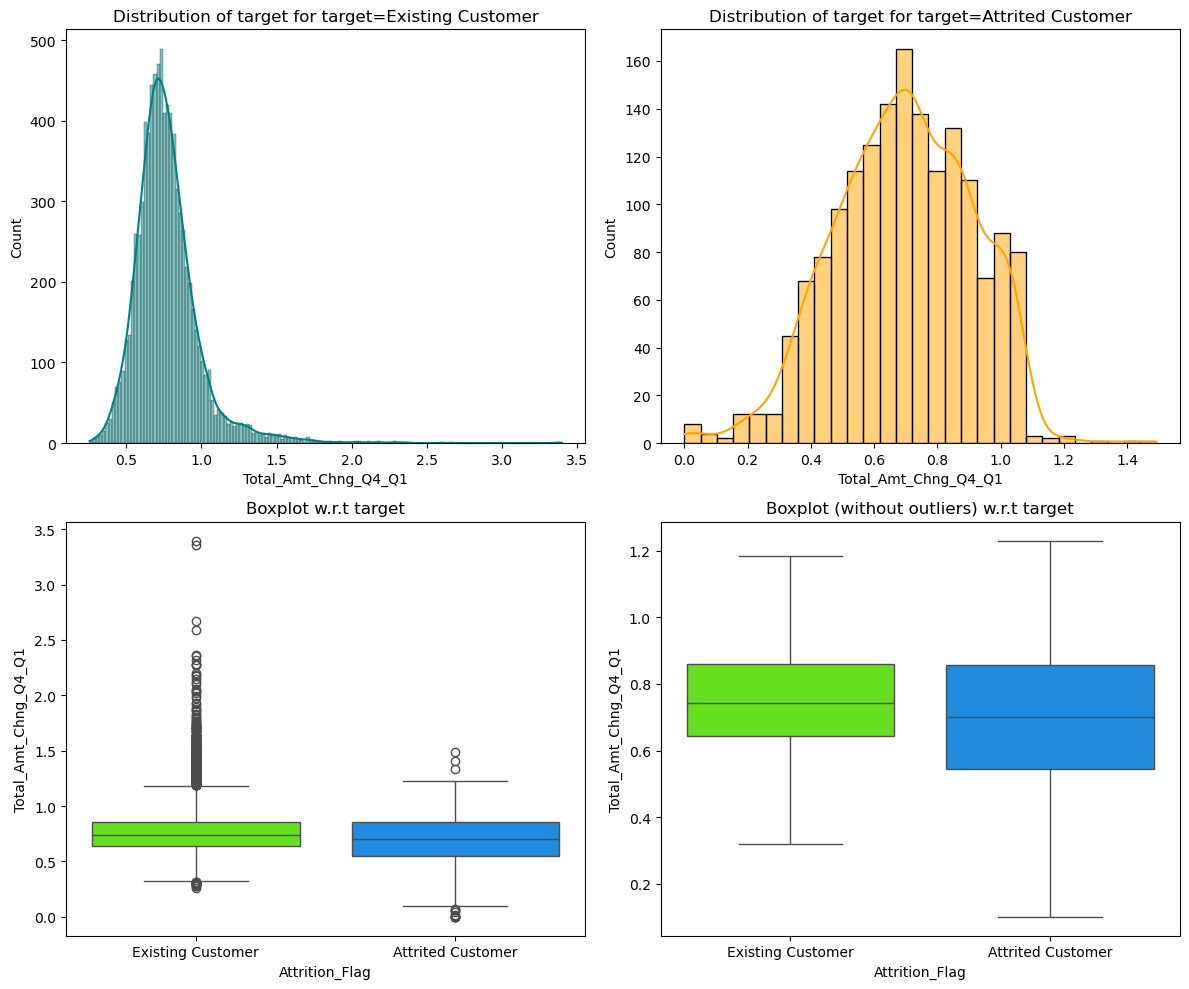

In [1262]:
print("################ Total_Amt_Chng_Q4_Q1 vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

### Total_Amt_Chng_Q4_Q1 vs Attrition_Flag Stats: 
1) 25% attritioned Customers have amount change below 0.5
2) 50% attritioned Customers have amount change below 0.7
3) Few attritioned Customers have 0 amount change and few had maximum and more that the max of the existing Customers

################ Total_Trans_Amt vs Attrition_Flag  Variable ##################


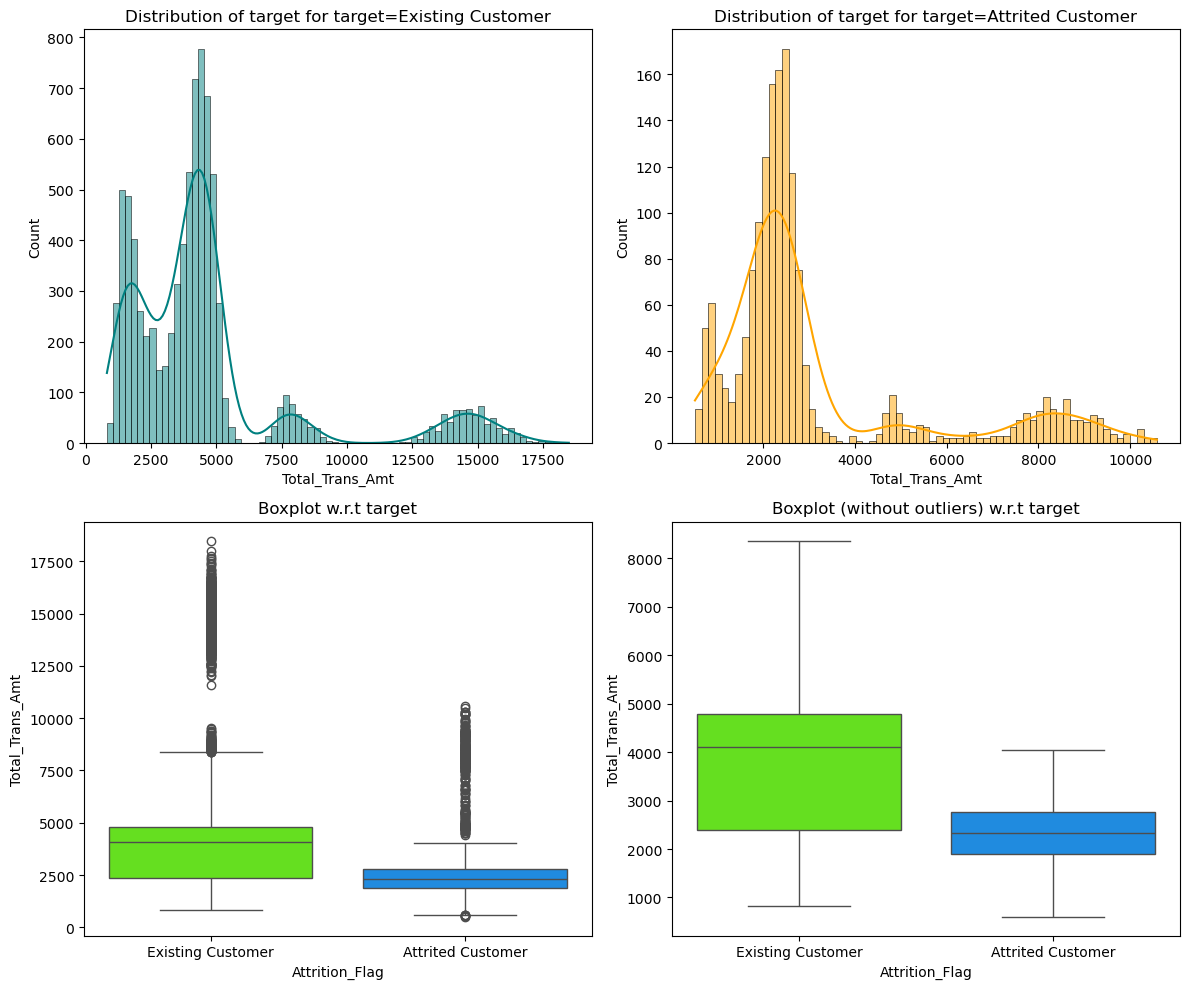

In [1265]:
print("################ Total_Trans_Amt vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Total_Trans_Amt', 'Attrition_Flag')

### Total_Trans_Amt vs Attrition_Flag Stats: 
1) Majority attritioned Customers made transactions lessthan 4000 in last 12 months 
2) 75% attritioned Customers made transactions lessthan 2800 in last 12 months 

################ Total_Trans_Ct vs Attrition_Flag  Variable ##################


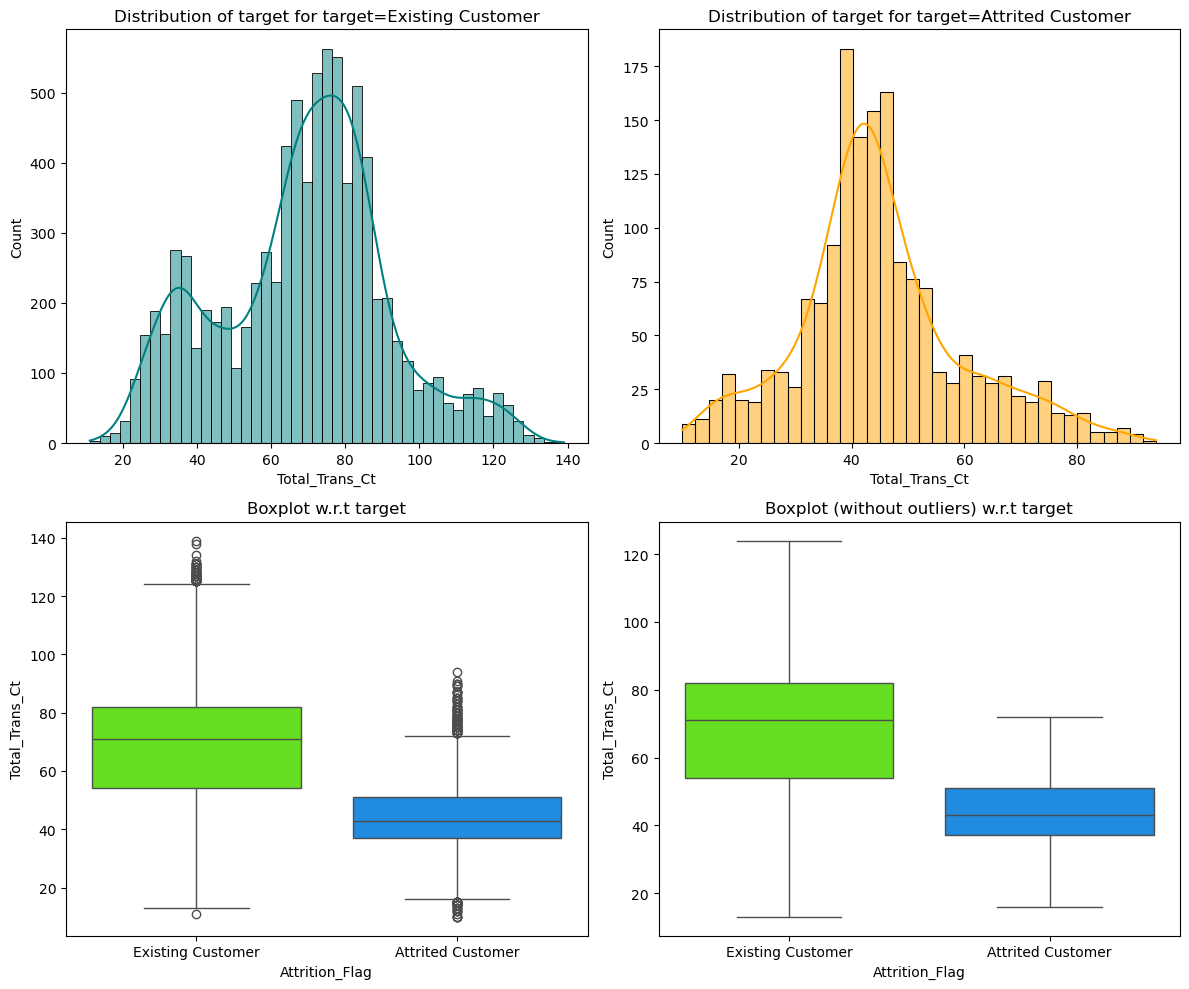

In [1268]:
print("################ Total_Trans_Ct vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Total_Trans_Ct', 'Attrition_Flag')

### Total_Trans_Ct vs Attrition_Flag Stats: 
1) Majority attritioned Customers made lessthan 75 transactions in last 12 months 
2) 75% attritioned Customers made lessthan 50 transactions in last 12 months
3) 25% attritioned Customers made lessthan 40 transactions in last 12 months
4) Few attritioned Customers have made lessthan 10 transactions in last 12 months
5) 25% existing customers made upto 50+ transactions in last 12 months


################ Total_Ct_Chng_Q4_Q1 vs Attrition_Flag  Variable ##################


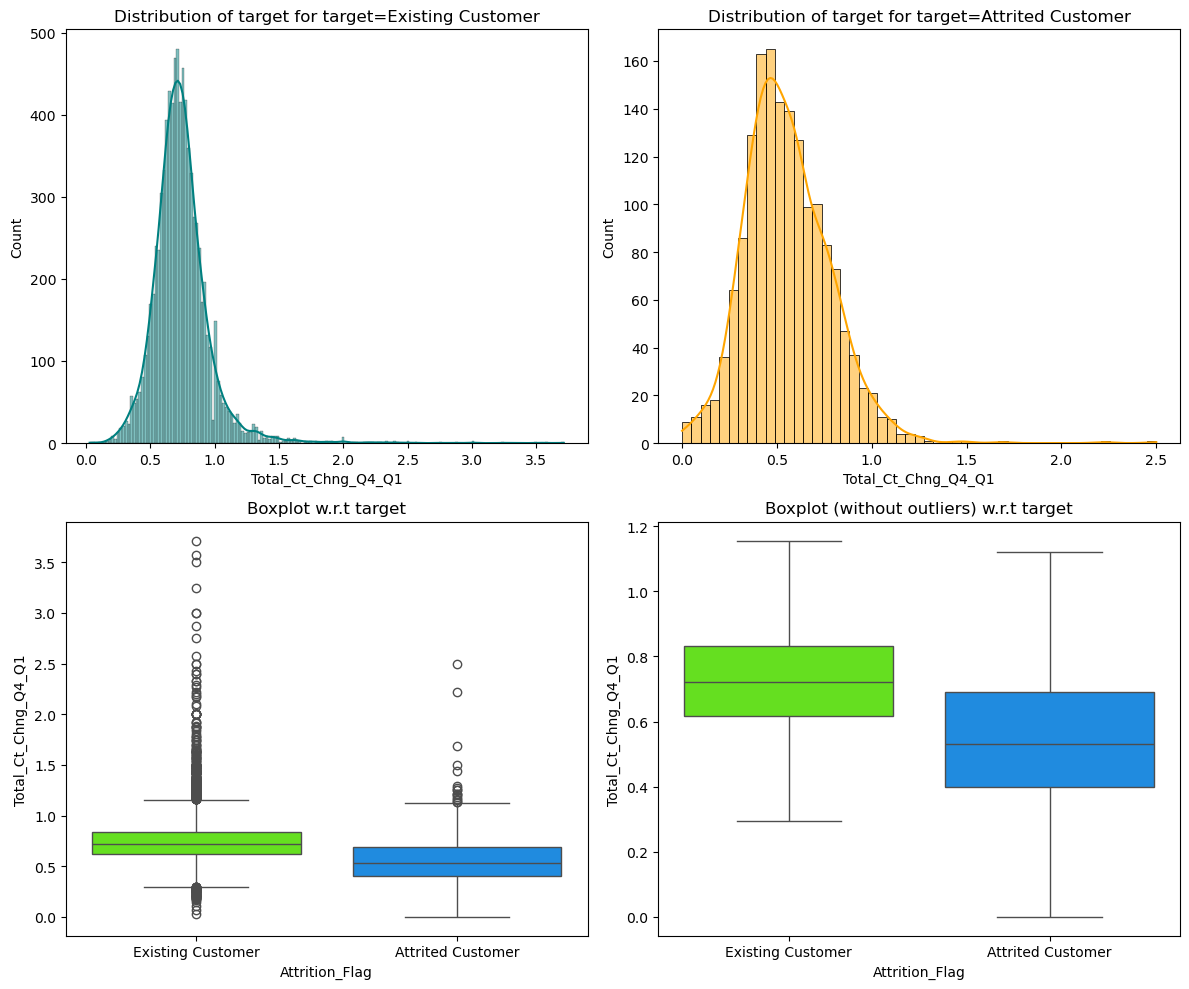

In [1271]:
print("################ Total_Ct_Chng_Q4_Q1 vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

### Total_Ct_Chng_Q4_Q1 vs Attrition_Flag Stats: 
1) Majority attritioned Customers made between 0 and 1 count change btw Q4 and Q1
2) 75% attritioned Customers made lessthan 1 count change btw Q4 and Q1
3) 25% attritioned Customers made lessthan 0.4 count change btw Q4 and Q1
4) Few attritioned Customers made no count change btw Q4 and Q1

################ Avg_Utilization_Ratio vs Attrition_Flag  Variable ##################


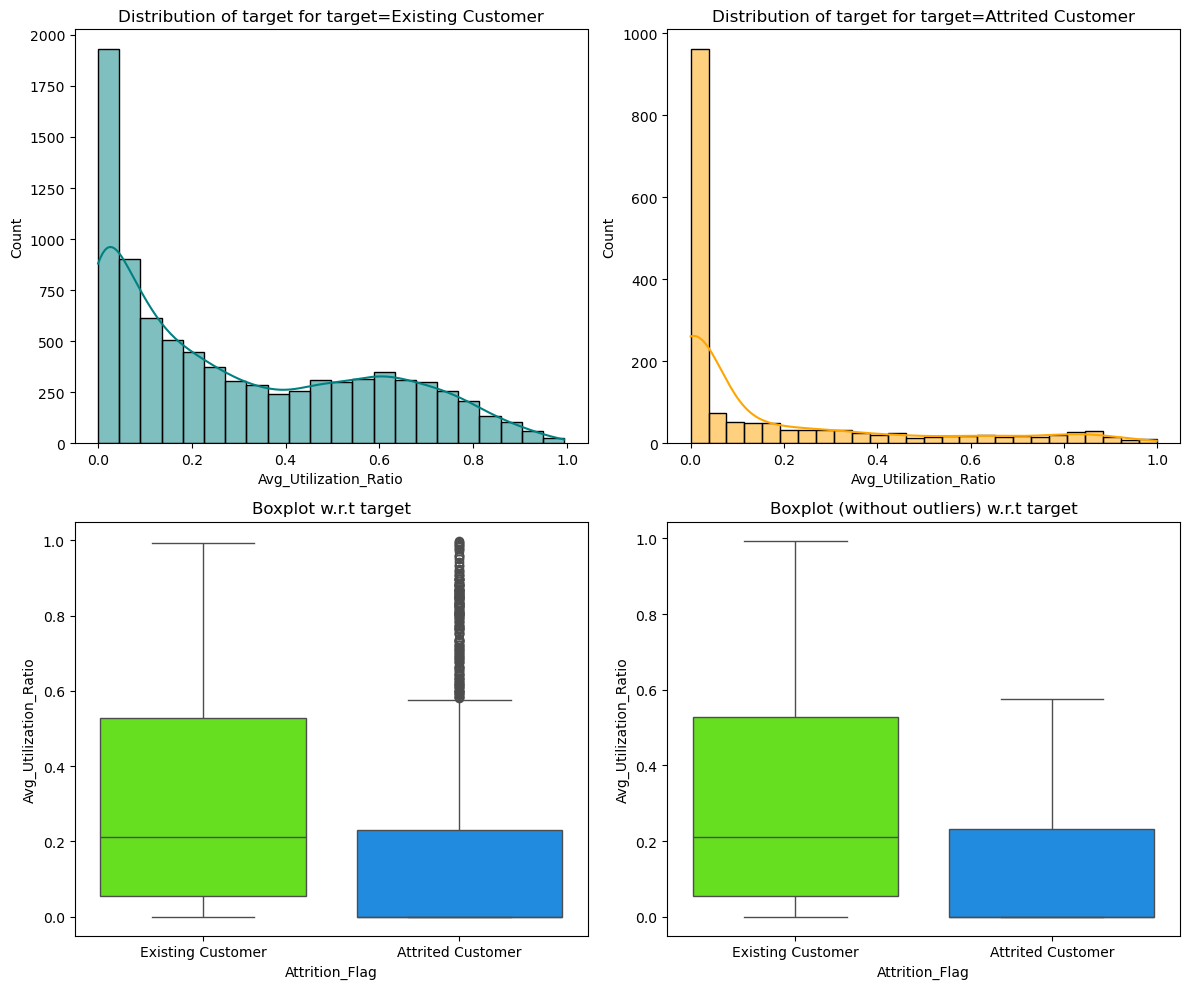

In [1273]:
print("################ Avg_Utilization_Ratio vs Attrition_Flag  Variable ##################")
distribution_plot_wrt_target(data,'Avg_Utilization_Ratio', 'Attrition_Flag')

### Avg_Utilization_Ratio vs Attrition_Flag Stats: 
1) 75% attritioned Customers have lessthan 0.22 utilization ratio
2) 25% attritioned Customers have lessthan 0.1 utilization ratio
3) Few attritioned Customers have 0 or negligible utilization ratio

################ Gender vs Attrition_Flag  Variable ##################
Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


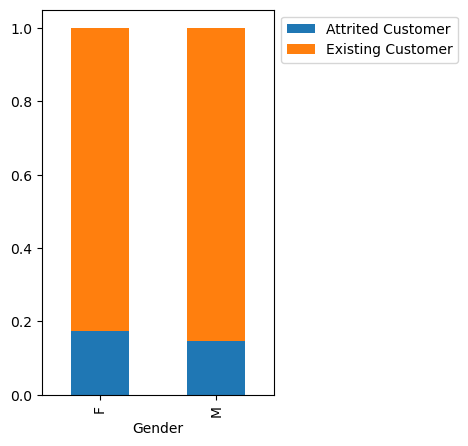

In [1276]:
print("################ Gender vs Attrition_Flag  Variable ##################")
stacked_barplot(data,'Gender', 'Attrition_Flag')

### Gender vs Attrition_Flag Stats: 
1) More female customers attritioned the bank than males
2) Bank has more female customers compared to male customers 

################ Education_Level vs Attrition_Flag  Variable ##################
Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


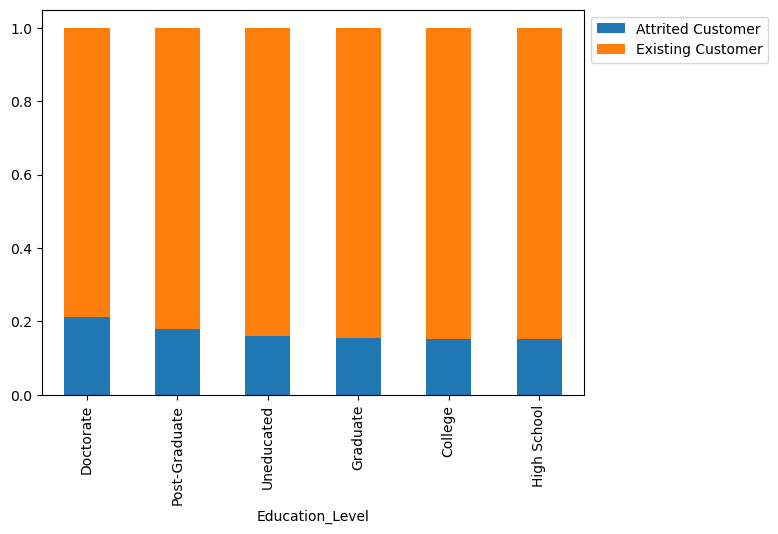

In [1279]:
print("################ Education_Level vs Attrition_Flag  Variable ##################")
stacked_barplot(data,'Education_Level', 'Attrition_Flag')

### Education_Level vs Attrition_Flag Stats: 
1) More educated customers left the bank than the uneducated customers
2) Higher education level customers left bank more than lower education levels

################ Marital_Status vs Attrition_Flag  Variable ##################
Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


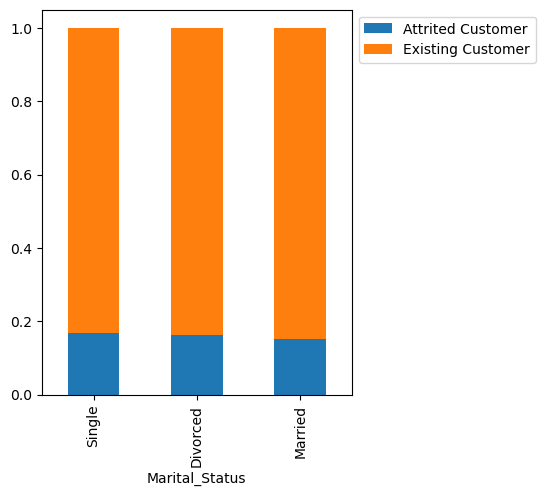

In [1283]:
print("################ Marital_Status vs Attrition_Flag  Variable ##################")
stacked_barplot(data,'Marital_Status', 'Attrition_Flag')

### Marital_Status vs Attrition_Flag Stats: 
1) More married and divorced customers left the bank than the single customers
2) Less Singles left the bank comparitively 

################ Income_Category vs Attrition_Flag  Variable ##################
Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


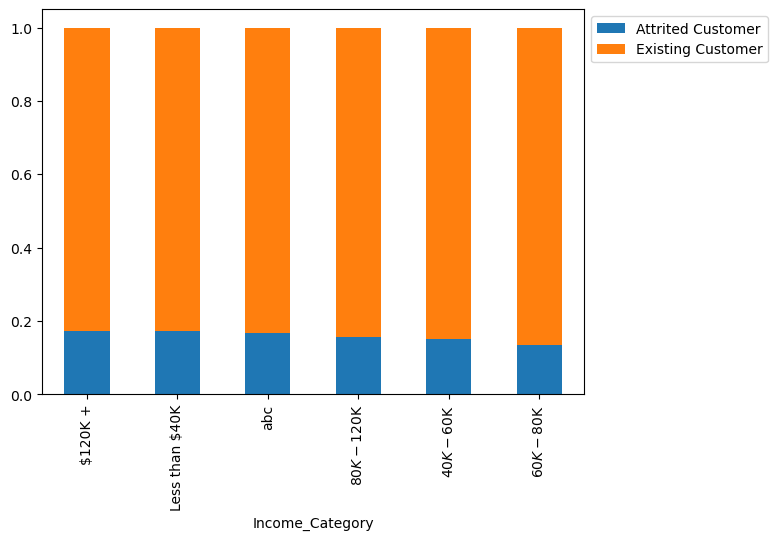

In [1286]:
print("################ Income_Category vs Attrition_Flag  Variable ##################")
stacked_barplot(data,'Income_Category', 'Attrition_Flag')

### Income_Category vs Attrition_Flag Stats: 
1) Atmost around 20% of customers left the bank in all income categories

################ Card_Category vs Attrition_Flag  Variable ##################
Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


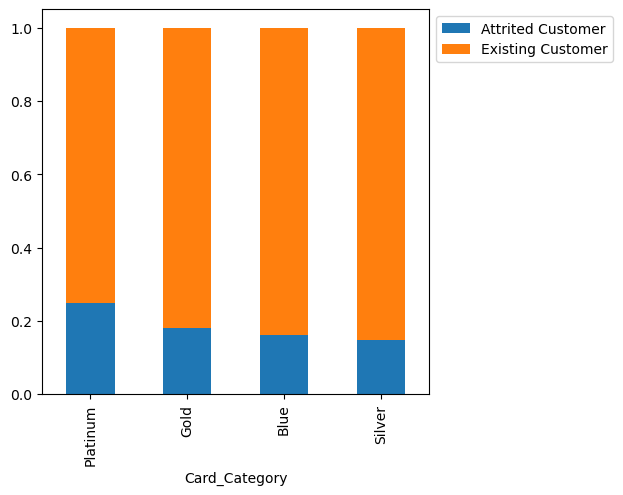

In [1289]:
print("################ Card_Category vs Attrition_Flag  Variable ##################")
stacked_barplot(data,'Card_Category', 'Attrition_Flag')

### Card_Category vs Attrition_Flag Stats: 
1) Percentage of Platinum card customers left the bank is more than other card category
2) Otherwise same percentage of customers left the bank in all other card categories

####### Check Correlations ###########


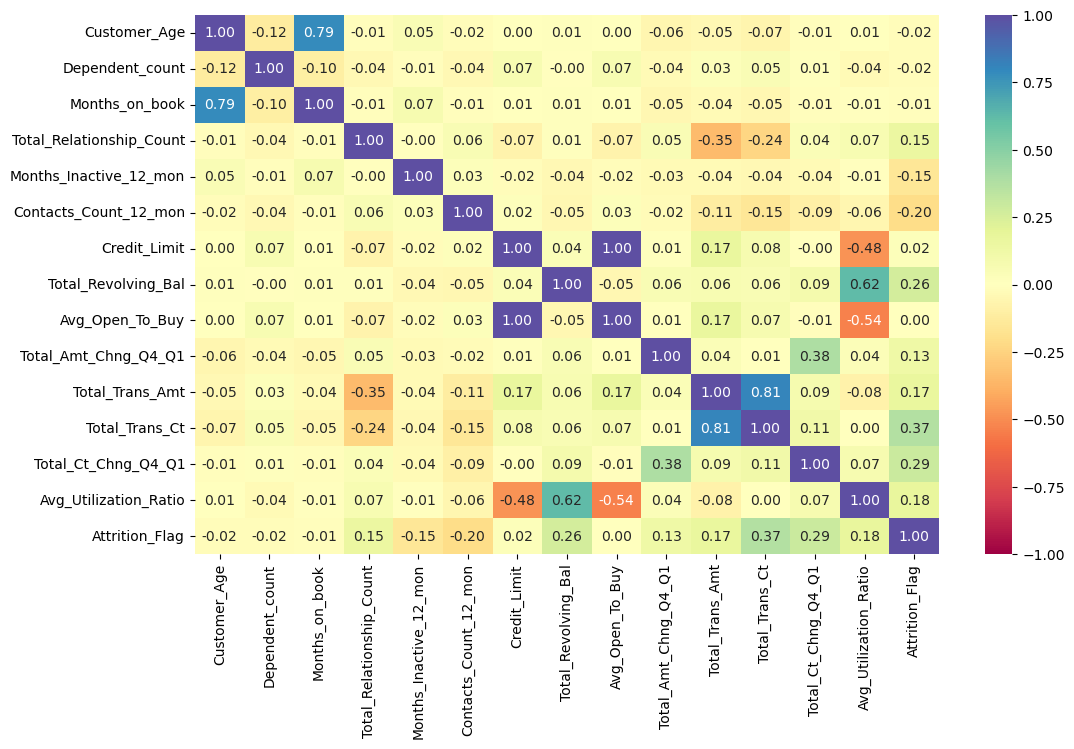

In [1292]:
print("####### Check Correlations ###########")

plt.figure(figsize=(12, 7))

updated_data=data.copy()
updated_data.Attrition_Flag=np.where(data.Attrition_Flag == 'Existing Customer', 1, 0)
updated_data["Attrition_Flag"]=updated_data["Attrition_Flag"].astype(int)

numerical_columns=["Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", 
                   "Months_Inactive_12_mon", "Contacts_Count_12_mon",
                  "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy" , 
                   "Total_Amt_Chng_Q4_Q1" , "Total_Trans_Amt", "Total_Trans_Ct", 
                   "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
                  , "Attrition_Flag"]

sns.heatmap(
    updated_data[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


### Correlation between the variables in the dataset:
### High Correlation assumption >/< +/-0.75 
1) Customer_Age and Months_on_book are highly corelate and both are less correlated to the target vaiable, good to remove months_on_book
2) Credit_Limit is fully correlated with Avg_Open_To_Buy, either one must be dropped. Based on target variable correlation, Avg_Open_To_Buy must be dropped
3) Total_Trans_Amt and Total_Trans_Ct are highly correlated, based on the target Correlation Total_Trans_Amt must be removed but will keep it, as it is one of the important parameter of the credit card usage that is familiar to Customers and they make decision based on that
4) Total_Revolving_Bal, Total_Tran_Amt, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio features are significantly correlated to target variable whereas Customer_Age, Dependent_count, Credit_Limit are least correlated to target
   

## Data Pre-processing

In [1296]:
# drop the columns months_on_book, Avg_Open_To_Buy, Total_Trans_Ct
data.drop(['Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct'], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

In [1298]:
from sklearn.model_selection import train_test_split

# Separating features and the target column
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# map the target to 1 or 0 for metrics and XGBoost validations
y = y.map({"Attrited Customer": 1, "Existing Customer": 0 })

print(y.value_counts())

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

data.dtypes

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64
(6075, 17) (2026, 17) (2026, 17)


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## Missing value imputation


In [1301]:
# Education_level and Maritial_Status have null values 
# 1) Can drop column
# 2) Can drop the null rows
# 3) Replace it with Mode
# 4) Use ML Supervised or Unsupervised models to predict the missing/null values
# 5) Replace it based on percentage of each type within 

# will go with #3 as the number of nulls are minimal or <= 12% in these columns
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cols = ['Education_Level', 'Marital_Status']

# Impute categorical columns
imputer = SimpleImputer(strategy='most_frequent')
X_train[cols] = imputer.fit_transform(X_train[cols])
X_val[cols] = imputer.transform(X_val[cols])
X_test[cols] = imputer.transform(X_test[cols])
#print("Train:\n",X_train.isnull().sum(), "Validation:\n", X_val.isnull().sum(), "Test:\n", X_test.isnull().sum())

# convert the 
X_train = pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
print("Train:\n",X_train.isnull().sum(), "Validation:\n", X_val.isnull().sum(), "Test:\n", X_test.isnull().sum())

Train:
 CLIENTNUM                         0
Customer_Age                      0
Dependent_count                   0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Income_Category_abc               0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [1307]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [1311]:

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGradient Boost", XGBClassifier(random_state=1)))

OriginalDataModels = {}

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    OriginalDataModels["Untuned_"+name]=model
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9713114754098361
Random forest: 1.0
Ada Boost: 0.7715163934426229
Gradient Boost: 0.8135245901639344
XGradient Boost: 1.0

Validation Performance:

Bagging: 0.8006134969325154
Random forest: 0.7484662576687117
Ada Boost: 0.7822085889570553
Gradient Boost: 0.8251533742331288
XGradient Boost: 0.8711656441717791


### Model Building with Oversampled data


In [1313]:
from imblearn.over_sampling import SMOTE
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [1314]:

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

OversampledDataModels = {}

models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGradient Boost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    OversampledDataModels["Untuned_"+name]=model
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9956854285153952
Random forest: 1.0
Ada Boost: 0.9299862718180035
Gradient Boost: 0.9452833888997842
XGradient Boost: 0.9998038831143361

Validation Performance:

Bagging: 0.8742331288343558
Random forest: 0.8098159509202454
Ada Boost: 0.8159509202453987
Gradient Boost: 0.8374233128834356
XGradient Boost: 0.8619631901840491


### Model Building with Undersampled data

In [1316]:
from imblearn.under_sampling import RandomUnderSampler
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [1317]:

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

UndersampledDataModels={}
models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGradient Boost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    UndersampledDataModels["Untuned_"+name]=model
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9918032786885246
Random forest: 1.0
Ada Boost: 0.9282786885245902
Gradient Boost: 0.9682377049180327
XGradient Boost: 1.0

Validation Performance:

Bagging: 0.9263803680981595
Random forest: 0.9233128834355828
Ada Boost: 0.9079754601226994
Gradient Boost: 0.950920245398773
XGradient Boost: 0.9447852760736196


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [1322]:
param_grids = {}

param_grids["Gradient Boost"]  =  {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
param_grids["Ada Boost"] = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

param_grids["Bagging"] = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

param_grids["Random forest"] = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


param_grids["XGradient Boost"] =  {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#### Sample tuning method for different with original data

In [1324]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGradient Boost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train,y_train)
    OriginalDataModels["Tuned_"+name]=randomized_cv
    scores = recall_score(y_train, randomized_cv.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train,y_train)
    scores_val = recall_score(y_val, randomized_cv.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 0.9989754098360656
Random forest: 0.951844262295082


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Ada Boost: 0.882172131147541


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Gradient Boost: 1.0
XGradient Boost: 0.9969262295081968

Validation Performance:

Bagging: 0.8067484662576687
Random forest: 0.7085889570552147


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Ada Boost: 0.8312883435582822


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Gradient Boost: 0.7668711656441718
XGradient Boost: 0.9294478527607362


#### Sample tuning method for different with Oversampled data

In [1326]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGradient Boost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train_over,y_train_over)
    OversampledDataModels["Tuned_"+name]=randomized_cv
    scores = recall_score(y_train_over, randomized_cv.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train_over,y_train_over)
    scores_val = recall_score(y_val, randomized_cv.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 1.0
Random forest: 0.9992155324573446


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Ada Boost: 0.9262600509903903


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Gradient Boost: 1.0
XGradient Boost: 0.9974504804863699

Validation Performance:

Bagging: 0.8711656441717791
Random forest: 0.8251533742331288


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Ada Boost: 0.852760736196319


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Gradient Boost: 0.7576687116564417
XGradient Boost: 0.9478527607361963


#### Sample tuning method for Decision tree with undersampled data

In [1328]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGradient Boost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train_un,y_train_un)
    UndersampledDataModels["Tuned_"+name]=randomized_cv
    scores = recall_score(y_train_un, randomized_cv.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train_un,y_train_un)
    scores_val = recall_score(y_val, randomized_cv.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 1.0
Random forest: 0.9948770491803278


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Ada Boost: 0.9846311475409836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Gradient Boost: 1.0
XGradient Boost: 1.0

Validation Performance:

Bagging: 1.0
Random forest: 0.901840490797546


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Ada Boost: 0.941717791411043


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Gradient Boost: 0.8895705521472392
XGradient Boost: 0.9785276073619632


#### Sample tuning method for Decision tree with undersampled data

## Model Comparison and Final Model Selection

#### Performance of Original Data

In [1332]:
original_models_train_performance_df = pd.DataFrame()
for name, model in OriginalDataModels.items():
   performance=model_performance_classification_sklearn(model, X_train, y_train)
   original_models_train_performance_df = pd.concat([original_models_train_performance_df, performance.T], axis=1)
original_models_train_performance_df.columns = OriginalDataModels.keys()
print("################# Training Performance #################:\n",original_models_train_performance_df)

original_models_val_performance_df = pd.DataFrame()
for name, model in OriginalDataModels.items():
   performance=model_performance_classification_sklearn(model, X_val, y_val)
   original_models_val_performance_df = pd.concat([original_models_val_performance_df, performance.T], axis=1)
original_models_val_performance_df.columns = OriginalDataModels.keys()
print("################ Validation Performance #################:\n",original_models_val_performance_df)

################# Training Performance #################:
            Untuned_Bagging  Untuned_Random forest  Untuned_Ada Boost  \
Accuracy          0.995226                    1.0           0.940905   
Recall            0.971311                    1.0           0.771516   
Precision         0.998946                    1.0           0.847019   
F1                0.984935                    1.0           0.807507   

           Untuned_Gradient Boost  Untuned_XGradient Boost  Tuned_Bagging  \
Accuracy                 0.960658                      1.0       0.999835   
Recall                   0.813525                      1.0       0.998975   
Precision                0.933020                      1.0       1.000000   
F1                       0.869184                      1.0       0.999487   

           Tuned_Random forest  Tuned_Ada Boost  Tuned_Gradient Boost  \
Accuracy              0.991934         0.973169                   1.0   
Recall                0.951844         0.882172 

#### Performance of OverSampled Data

In [1334]:
oversampled_models_train_performance_df = pd.DataFrame()
for name, model in OversampledDataModels.items():
   performance=model_performance_classification_sklearn(model, X_train_over, y_train_over)
   oversampled_models_train_performance_df = pd.concat([oversampled_models_train_performance_df, performance.T], axis=1)
oversampled_models_train_performance_df.columns = OversampledDataModels.keys()
print("################## Training Performance #################:\n",oversampled_models_train_performance_df)

oversampled_models_val_performance_df = pd.DataFrame()
for name, model in OversampledDataModels.items():
   performance=model_performance_classification_sklearn(model, X_val, y_val)
   oversampled_models_val_performance_df = pd.concat([oversampled_models_val_performance_df, performance.T], axis=1)
oversampled_models_val_performance_df.columns = OversampledDataModels.keys()
print("################ Validation Performance ##################:\n",oversampled_models_val_performance_df)

################## Training Performance #################:
            Untuned_Bagging  Untuned_Random forest  Untuned_Ada Boost  \
Accuracy          0.996862                    1.0           0.928221   
Recall            0.995685                    1.0           0.929986   
Precision         0.998034                    1.0           0.926715   
F1                0.996858                    1.0           0.928348   

           Untuned_Gradient Boost  Untuned_XGradient Boost  Tuned_Bagging  \
Accuracy                 0.956560                 0.999804            1.0   
Recall                   0.945283                 0.999804            1.0   
Precision                0.967095                 0.999804            1.0   
F1                       0.956065                 0.999804            1.0   

           Tuned_Random forest  Tuned_Ada Boost  Tuned_Gradient Boost  \
Accuracy              0.998431         0.930280                   1.0   
Recall                0.999216         0.926260

#### Performance of UnderSampled Data

In [1337]:
undersampled_models_train_performance_df = pd.DataFrame()
for name, model in UndersampledDataModels.items():
   performance=model_performance_classification_sklearn(model, X_train_un, y_train_un)
   undersampled_models_train_performance_df = pd.concat([undersampled_models_train_performance_df, performance.T], axis=1)
undersampled_models_train_performance_df.columns = UndersampledDataModels.keys()
print("############# Training Performance #################:\n",undersampled_models_train_performance_df)

undersampled_models_val_performance_df = pd.DataFrame()
for name, model in UndersampledDataModels.items():
   performance=model_performance_classification_sklearn(model, X_val, y_val)
   undersampled_models_val_performance_df = pd.concat([undersampled_models_val_performance_df, performance.T], axis=1)
undersampled_models_val_performance_df.columns = UndersampledDataModels.keys()
print("############# Validation Performance ################:\n",undersampled_models_val_performance_df)

############# Training Performance #################:
            Untuned_Bagging  Untuned_Random forest  Untuned_Ada Boost  \
Accuracy          0.994365                    1.0           0.925205   
Recall            0.991803                    1.0           0.928279   
Precision         0.996910                    1.0           0.922607   
F1                0.994350                    1.0           0.925434   

           Untuned_Gradient Boost  Untuned_XGradient Boost  Tuned_Bagging  \
Accuracy                 0.962090                      1.0       0.500000   
Recall                   0.968238                      1.0       1.000000   
Precision                0.956478                      1.0       0.500000   
F1                       0.962322                      1.0       0.666667   

           Tuned_Random forest  Tuned_Ada Boost  Tuned_Gradient Boost  \
Accuracy              0.994365         0.981557                   1.0   
Recall                0.994877         0.984631     

### Test set final performance

In [1340]:
original_models_val_performance_df = pd.DataFrame()
for name, model in OriginalDataModels.items():
   performance=model_performance_classification_sklearn(model, X_test, y_test)
   original_models_val_performance_df = pd.concat([original_models_val_performance_df, performance.T], axis=1)
original_models_val_performance_df.columns = OriginalDataModels.keys()
print("################ Original Data Test Performance #################:\n",original_models_val_performance_df)

oversampled_models_val_performance_df = pd.DataFrame()
for name, model in OversampledDataModels.items():
   performance=model_performance_classification_sklearn(model, X_test, y_test)
   oversampled_models_val_performance_df = pd.concat([oversampled_models_val_performance_df, performance.T], axis=1)
oversampled_models_val_performance_df.columns = OversampledDataModels.keys()
print("################ Oversampled Data Test Performance ##################:\n",oversampled_models_val_performance_df)

undersampled_models_val_performance_df = pd.DataFrame()
for name, model in UndersampledDataModels.items():
   performance=model_performance_classification_sklearn(model, X_test, y_test)
   undersampled_models_val_performance_df = pd.concat([undersampled_models_val_performance_df, performance.T], axis=1)
undersampled_models_val_performance_df.columns = UndersampledDataModels.keys()
print("############# Undersampled Data test Performance ################:\n",undersampled_models_val_performance_df)

################ Original Data Test Performance #################:
            Untuned_Bagging  Untuned_Random forest  Untuned_Ada Boost  \
Accuracy          0.955084               0.943731           0.936328   
Recall            0.812308               0.713846           0.760000   
Precision         0.897959               0.916996           0.828859   
F1                0.852989               0.802768           0.792937   

           Untuned_Gradient Boost  Untuned_XGradient Boost  Tuned_Bagging  \
Accuracy                 0.958045                 0.970879       0.954097   
Recall                   0.809231                 0.889231       0.790769   
Precision                0.919580                 0.926282       0.911348   
F1                       0.860884                 0.907378       0.846787   

           Tuned_Random forest  Tuned_Ada Boost  Tuned_Gradient Boost  \
Accuracy              0.932379         0.965943              0.923495   
Recall                0.658462         

## Test set final performance
Tuned XGradient Boost model is the best model based on Recall across all data sets (Original, Oversampled and Undersampled)

In [1342]:
print("Original Tuned XGradient Boost Model:\n", OriginalDataModels["Tuned_XGradient Boost"])
print("Oversampled Tuned XGradient Boost Model:\n", OversampledDataModels["Tuned_XGradient Boost"])
print("Undersampled Tuned XGradient Boost Model:\n", UndersampledDataModels["Tuned_XGradient Boost"])

Original Tuned XGradient Boost Model:
 RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                             

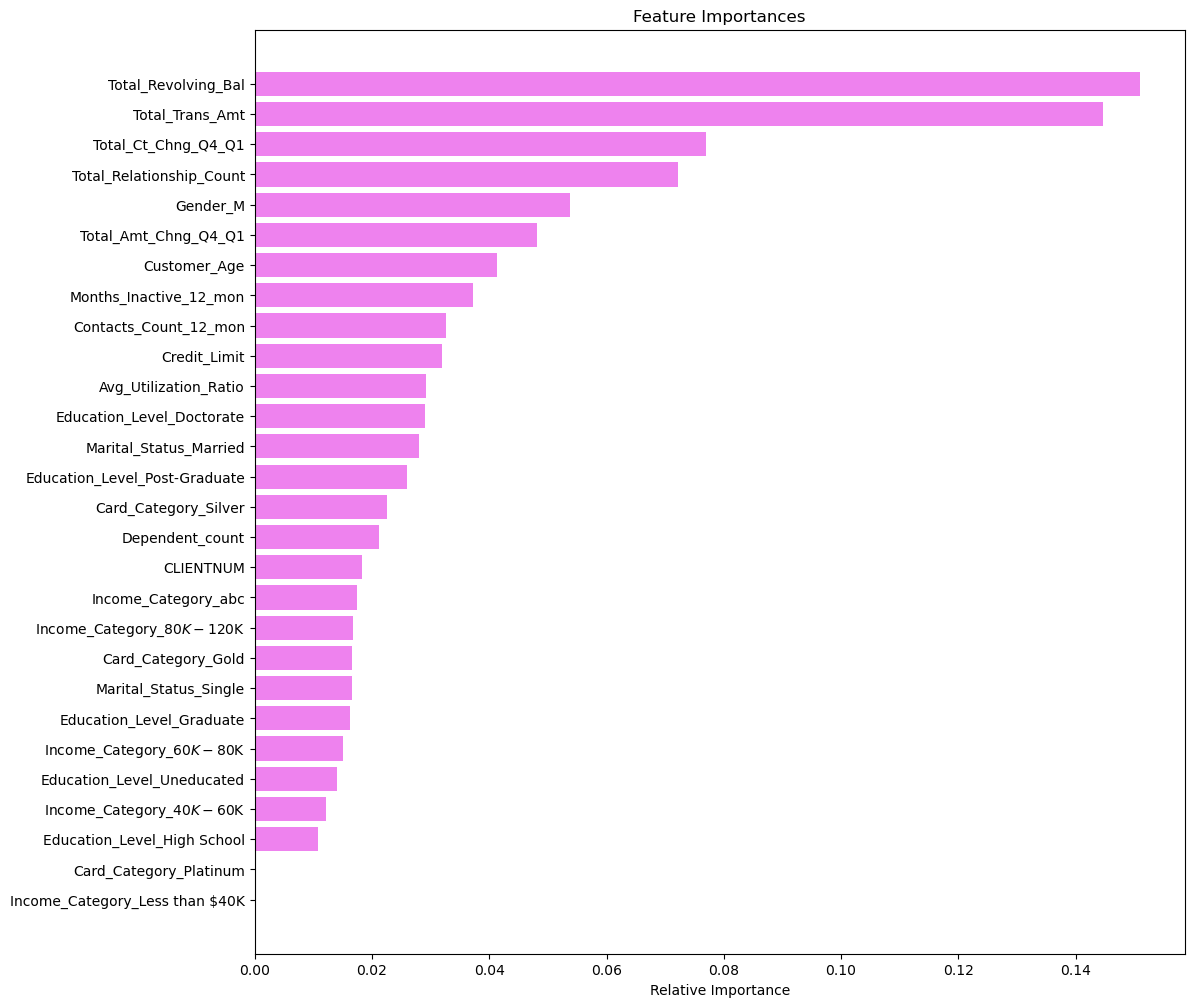

In [1343]:
feature_names = list(X_train.columns)
importances = OriginalDataModels["Tuned_XGradient Boost"].best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

* 1) Total_Revolving_Balance is the first significant factor to determine the churn per the best ml model. Customers with some Total_Revolving_Balance tend to move out, bank may look at options to provide EMI facility with attaractive interest rates.
  2) Total_Trans_Amt is another important factor, if customers tend to slow down on the credit card usage then they may want to leave the bank. Provide relevant consumer offers on different products, miles, moneyback and free vouchers to make the customers use the credit card for purchases
  3) Total Transaction Count Change is another factor to look at if the customers credit card transactions count change is <0.4 quarterly then those would leave the bank. Provide offers to use credit card for monthly/weekly bill payments so that transactions count increases or remain at a stable rate
  4) Customers with lessthan 3 bank products have left the back, identify the customers with lessthan 3 products and try to market more products/new products to those customers and ensure they opt for it in a timely manner
  5) More female customers leave bank than males, make sure to increase offers that are female centric 

***